In [ ]:
# Code for the Book: International Stock Picking A.I. INVESTOR: A Guide to Build.
# Website: ai-investor.net
# Code needs am "All-In-One" subscription from the (presumably) nice people at https://eodhistoricaldata.com/. 
# Check the book text to see if they have changed their service since mid-2021.

# Damon Lee 2021

# Feel free to fork this code for others to see what can be done with it.

In [ ]:
myToken = 'ABC123.XXXXXX.84098767' # Own token from EODHistoricalData

In [3]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import requests

from myFunctions import *

# Set the plotting DPI settings to be a bit higher.
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [7.0, 4.5]
plt.rcParams['figure.dpi'] = 150

# Load Keras

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'# USE THIS TO TURN OFF GPU

In [3]:
# VIEW NEURAL NET LIBRARY VERSION AND PC HARDWARE
import tensorflow as tf
from tensorflow import keras
print(tf.__version__,'\n',keras.__version__)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
logging.getLogger('tensorflow').disabled=True

2.0.0 
 2.2.4-tf
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16065779542166803501
]


# Load X and y, Transform and Scale X and y For Neural Network
and get AltmanZ too

Text(0.5, 1.0, 'Transformed y Data for Neural Net')

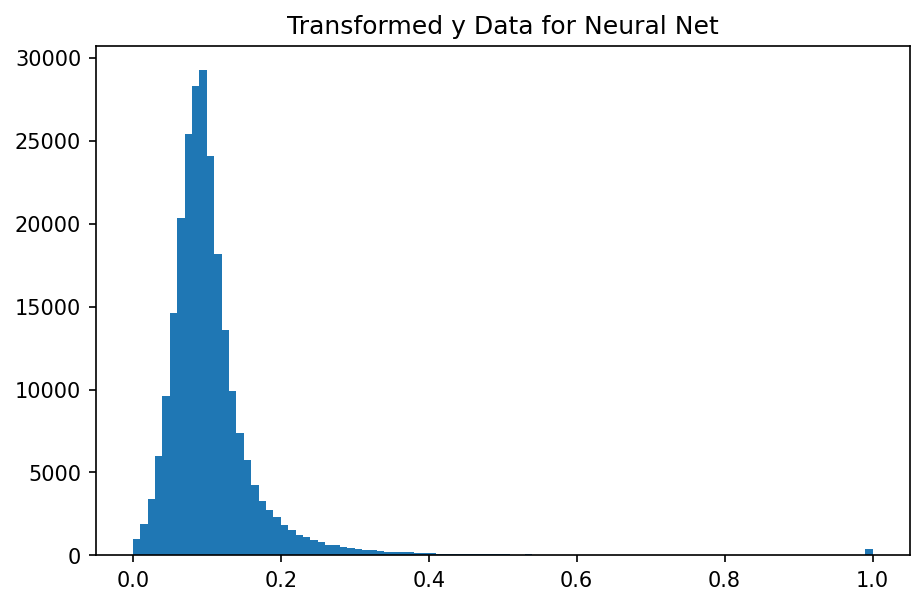

In [4]:
X=pd.read_csv('filteredAnnualStockFeatures_2021.csv', index_col=0)
y=pd.read_csv('filteredAnnualStockPerformance_2021.csv', index_col=0)

X.drop('BookEquity/TL', axis=1, inplace=True)

#distribution fix
X[X.keys()[5]].clip(-10,2,inplace=True)
X[X.keys()[11]].clip(0,100,inplace=True)
X[X.keys()[12]].clip(-2000,2000,inplace=True)
X[X.keys()[13]].clip(-5,5,inplace=True)
X[X.keys()[14]].clip(-100,100,inplace=True)
X[X.keys()[15]].clip(-1.5,1,inplace=True)
X[X.keys()[16]].clip(-7,1,inplace=True)
X[X.keys()[17]].clip(-3,1,inplace=True)

# randomize the rows
X['y'] = y
X = X.sample(frac=1.0, random_state=42) # randomize the rows
y = X['y']
X.drop(columns=['y'], inplace=True)
z = calcZScores(X).values.reshape(-1,1) # Want to store the Z score for later

from sklearn.preprocessing import power_transform
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_t = min_max_scaler.fit_transform(power_transform(X))
y_t = (y+1).values.reshape(-1,1)/11

plt.hist(y_t, bins=100);
plt.title('Transformed y Data for Neural Net')

In [5]:
X

,P/E,P/S,P/B,RoE,ROCE,grossProfitMargin,fixedAssetTurnover,workingAssetTurnover,workingCapitalRatio,Debt/Equity,cashRatio,debtRatio,EV/EBIT,Op. In./(NWC+FA),Op. In./interestExpense,EBIT/TA,RE/TA,(CA-CL)/TA
198887,7.059495,0.835680,3.058289,0.433216,0.372657,0.359293,12.745286,4.914036,2.867990,1.112554,0.411090,1.898832,4.563636,0.220712,100.000000,0.302329,0.535218,0.352527
461806,4.468729,1.940412,0.934619,0.209146,0.143897,0.374560,0.523546,9.564394,1.267215,0.358252,0.287485,3.791332,5.941080,0.261715,52.797634,0.123931,0.000000,0.037077
258763,702.161224,179.798696,123.224106,0.175493,0.095879,0.487871,4.469880,1.818627,2.366071,0.695197,0.491071,2.438441,904.506556,0.328688,6.738095,0.080276,1.000000,0.222303
26662,-1.280329,10.082234,2.190072,-1.710554,-1.806387,1.000000,300.000000,0.415012,100.000000,0.004524,50.000000,100.000000,-1.035251,0.341809,1.800921,-1.500000,0.000000,0.521051
532228,8.122589,1.219938,1.389916,0.171117,0.096935,0.433499,5.469969,3.578432,2.067289,0.664077,0.063070,2.505849,11.203759,0.345715,4.544182,0.079558,0.236048,0.191331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220924,-68.812470,14.900111,10.671656,-0.155083,-0.120644,0.644373,9.414871,-6.169786,0.757416,1.786929,0.116944,1.559619,-42.440565,0.791575,-0.273240,-0.099929,-0.234979,-0.041653
179851,3.594806,0.341233,4.981567,1.385768,0.058961,0.460876,3.180528,-60.231788,0.945930,8.846174,0.003999,1.113043,15.695877,0.564870,10.826748,0.032118,0.236299,-0.024616
250270,39.453516,0.541729,8.100558,0.205319,-0.008822,0.255828,20.376335,8.012070,1.869728,3.800536,0.029412,1.263121,-349.437818,0.164453,3.661003,-0.004879,0.215070,0.388775
289626,-14.913121,408.640444,0.088590,-0.005940,-0.009115,-0.088299,300.000000,0.000409,7.356674,0.083354,0.009336,12.997001,-9.633740,-0.005201,-100.000000,-0.008414,0.415546,0.489088


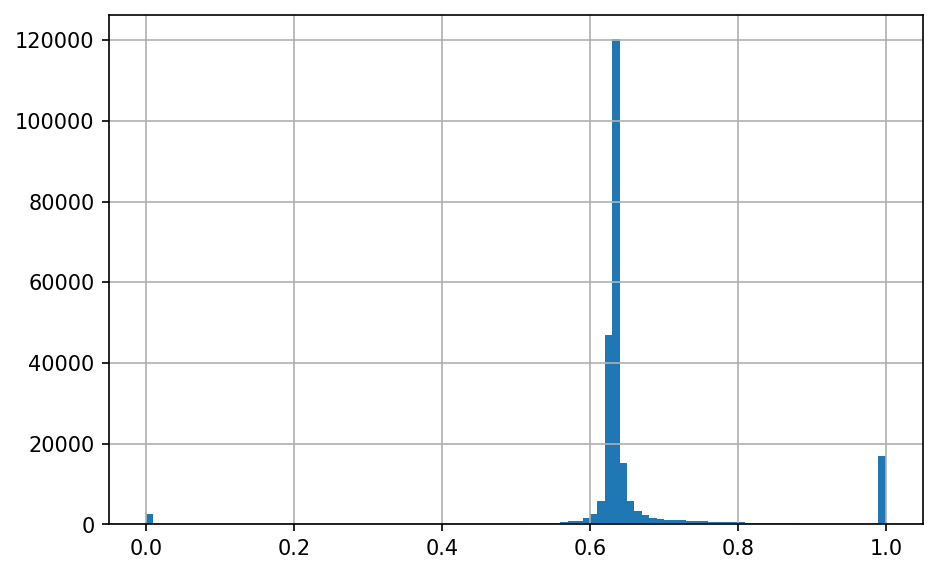

In [6]:
pd.DataFrame(X_t)[0].hist(bins=100);

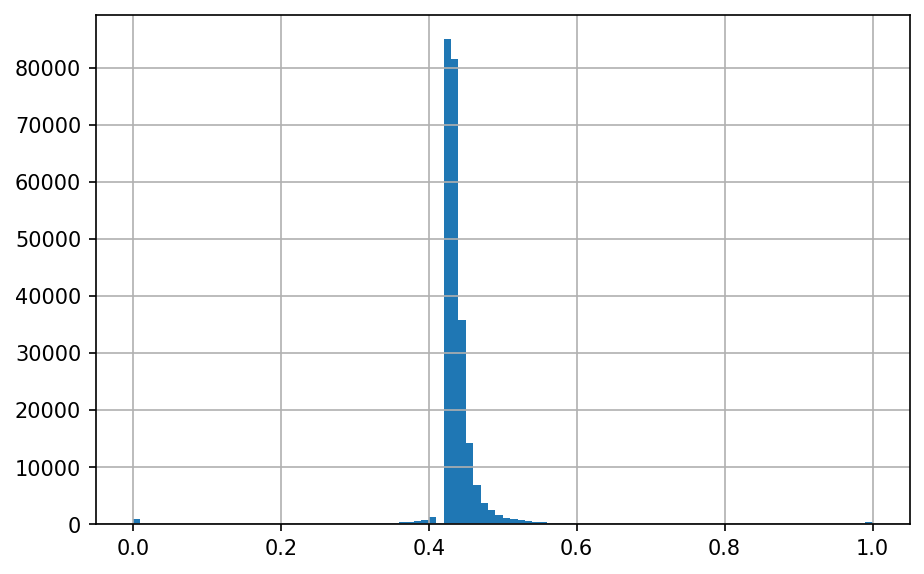

In [7]:
pd.DataFrame(X_t)[9].hist(bins=100);

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, z_train, z_test = \
train_test_split(X_t, y_t, z, test_size=0.5, random_state=42)

# Make Neural Net, See Learning Curve

In [18]:
def newModel():
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(18, activation = 'relu', input_shape = (18,)))
    model.add(keras.layers.Dense(18, activation='relu'))
    model.add(keras.layers.Dense(18, activation='relu'))
    model.add(keras.layers.Dense(10, activation='relu'))
    #model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(10, activation='relu'))
    model.add(keras.layers.Dense(1, activation='relu'))

    optimizer = keras.optimizers.Adam(learning_rate = 0.0001,  #0001
                                      amsgrad = False)

    model.compile(loss='mean_squared_error', optimizer=optimizer)
    #model.summary()
    return model

In [21]:
import time
start = time.perf_counter()
model = newModel()
history = model.fit(X_train, y_train, batch_size=512, epochs=20, 
                    validation_data=(X_test, y_test), 
                    verbose=0)
print('Time taken:', time.perf_counter() - start, ' seconds')

Time taken: 7.264886400000023  seconds


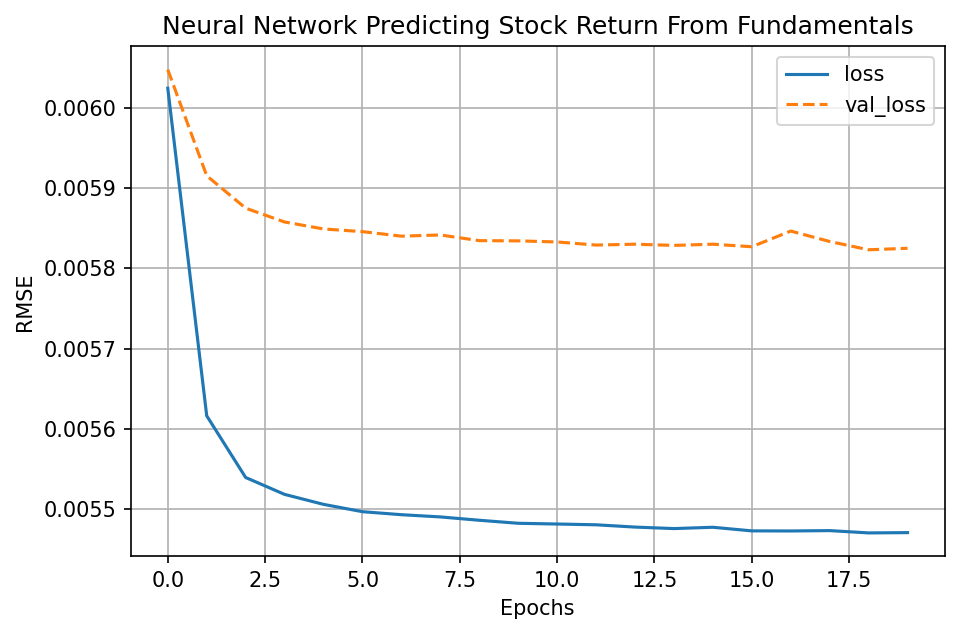

In [441]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'--')
plt.legend(['loss','val_loss'])
plt.grid()
plt.ylabel('RMSE');
plt.xlabel('Epochs');
plt.title('Neural Network Predicting Stock Return From Fundamentals');

# Use The Neural Net

In [442]:
y_pred = model.predict(X_test)
answers = pd.DataFrame(np.concatenate((y_test, y_pred, z_test), axis=1),
                       columns=['y_test', 'y_pred', 'z_test']).sort_values(by='y_pred', 
                                                                 ascending=False).reset_index()

answers[['y_test', 'y_pred']] = (answers[['y_test', 'y_pred']] * 11) - 1
answers

,index,y_test,y_pred,z_test
0,121416,-0.766667,1.014102,-4.126678
1,63338,0.078035,0.991379,-2.598093
2,112768,-0.213113,0.982017,-13.367969
3,95904,-0.900000,0.964872,-6.998108
4,46453,0.511364,0.960262,-27.681077
...,...,...,...,...
122848,10884,-0.606299,-0.203773,-39.792512
122849,67182,-0.583333,-0.209474,-45.256416
122850,61189,-0.913462,-0.235970,-50.119568
122851,110091,0.000000,-0.245194,-49.975652


In [592]:
portSize=50
#top = answers[answers['z_test']>3].head(portSize).reset_index(drop=True)
#bot = answers[answers['z_test']>3].tail(portSize).reset_index(drop=True)

top = answers.head(portSize).reset_index(drop=True)
bot = answers.tail(portSize)

print('top', round(top['y_test'].mean(),4))
print('bot', round(bot['y_test'].mean(),4))

top 0.6788
bot 0.0091


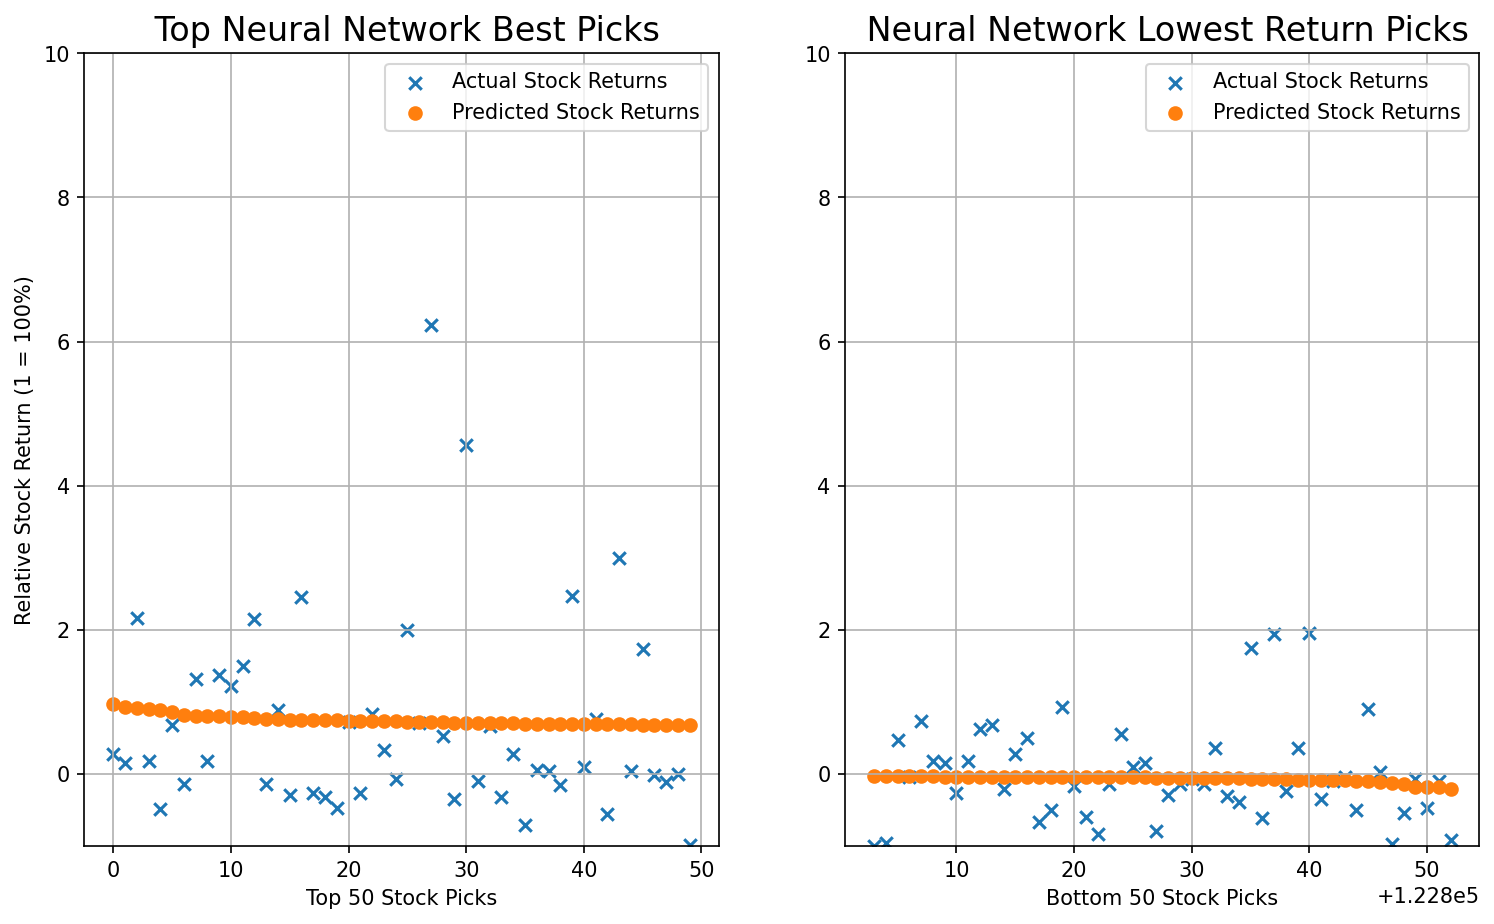

In [607]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.scatter(top.index, top['y_test'], marker='x')
plt.scatter(top.index, top['y_pred'])
plt.ylim([-1,10])
plt.grid()
plt.legend(['Actual Stock Returns','Predicted Stock Returns'])
plt.ylabel('Relative Stock Return (1 = 100%)')
plt.xlabel('Top 50 Stock Picks')
plt.title(' Top Neural Network Best Picks', fontsize=16);

plt.subplot(1,2,2)
plt.scatter(bot.index, bot['y_test'], marker='x')
plt.scatter(bot.index, bot['y_pred'])
plt.ylim([-1,10])
plt.grid()
plt.legend(['Actual Stock Returns','Predicted Stock Returns'])
#plt.ylabel('Relative Stock Return (1 = 100%)')
plt.xlabel('Bottom 50 Stock Picks')
plt.title(' Neural Network Lowest Return Picks', fontsize=16);

Text(0.5, 0, 'Relative Return (1 for 100%, -1 for -100%)')

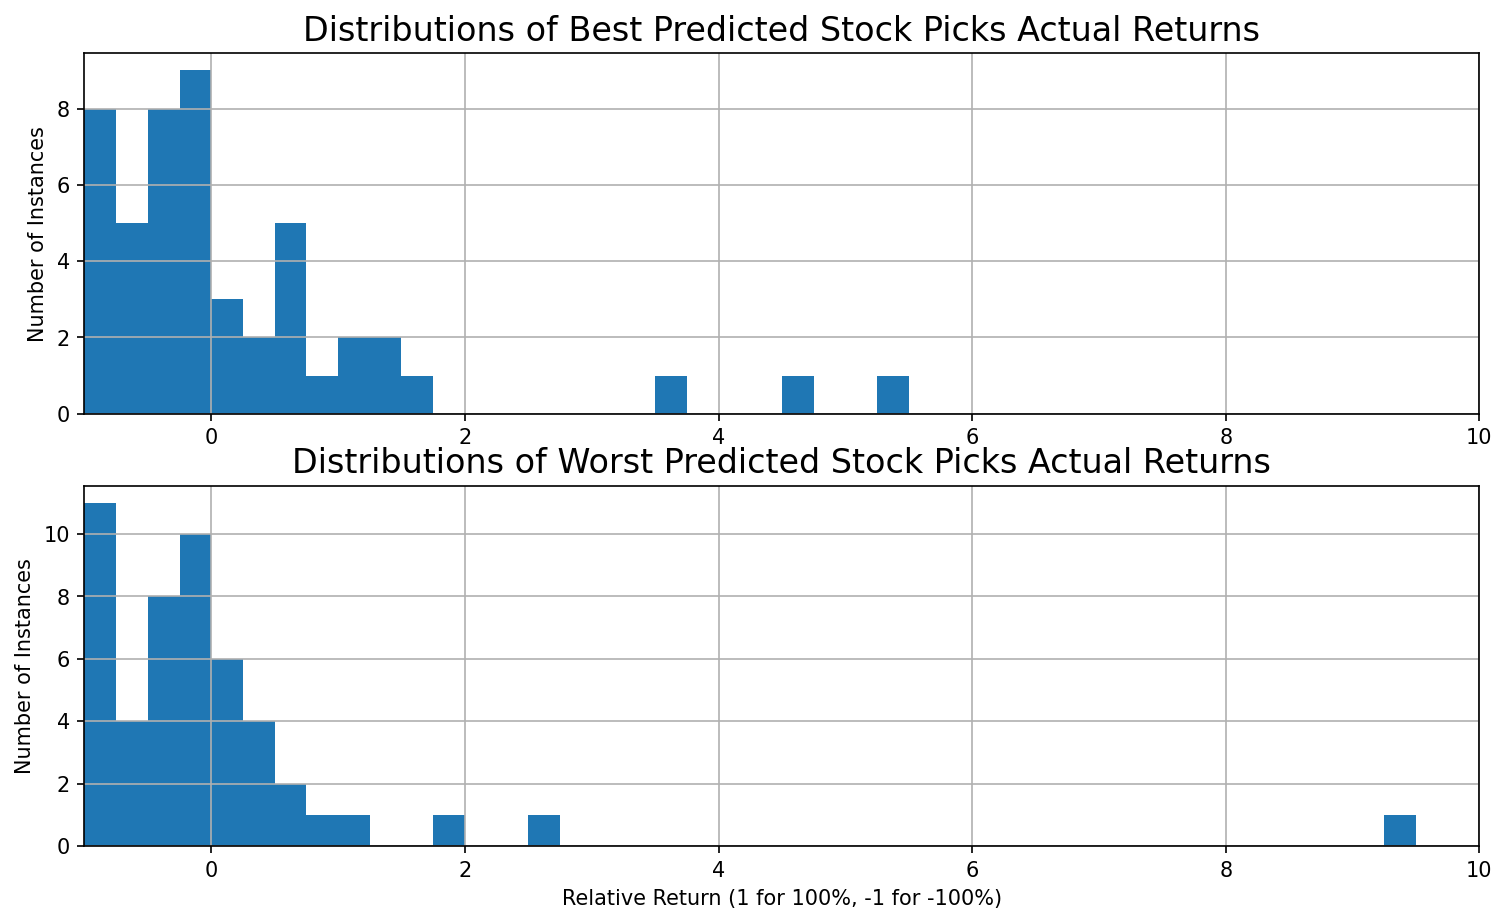

In [452]:
plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
top['y_test'].hist(bins=np.arange(-1,11,0.25))
plt.xlim([-1,10])
plt.title('Distributions of Best Predicted Stock Picks Actual Returns', fontsize=16)
plt.ylabel('Number of Instances')
#plt.xlabel('Relative Return (1 for 100%, -1 for -100%)')
plt.subplot(2,1,2)
bot['y_test'].hist(bins=np.arange(-1,11,0.25))
plt.xlim([-1,10])
plt.title('Distributions of Worst Predicted Stock Picks Actual Returns', fontsize=16)
plt.ylabel('Number of Instances')
plt.xlabel('Relative Return (1 for 100%, -1 for -100%)')

# Investigate the Neural Net Prediciton Results

In [608]:
# Store Neural Net Stock Pick Performances in DataFrame
NN_stockReturnResults=pd.DataFrame() 

for i in range(0, 1000):
    model = newModel()
    
    history = model.fit(X_train, y_train, batch_size=512, epochs=20, 
                        validation_data=(X_test, y_test), verbose=0)
    
    y_pred = model.predict(X_test)
    
    answers = \
    pd.DataFrame(np.concatenate((y_test, y_pred, z_test), axis=1),
                 columns=['y_test', 
                          'y_pred', 
                          'z_test']).sort_values(by='y_pred',
                                                 ascending=False).reset_index()
    
    answers['z_test'] = answers['z_test'].clip(-100,100)
    answers[['y_test', 'y_pred']] = (answers[['y_test', 'y_pred']] * 11) - 1
    portSize=20
    topFiltered=answers[answers['z_test']>3].head(portSize).reset_index(drop=True)
    botFiltered=answers[answers['z_test']>3].tail(portSize).reset_index(drop=True)

    top = answers.head(portSize).reset_index(drop=True)
    bot = answers.tail(portSize)

    row = {'top': round(top['y_test'].mean(),4), #Portfolio of top picks
          'bot': round(bot['y_test'].mean(),4), #Portfolio of bottom picks
          'topZ': round(top['z_test'].mean(),4), # Avg. Z score of top picks
          'botZ': round(bot['z_test'].mean(),4), # Avg. Z score of bottom picks
           
           #Portfolio of top picks only Z>3 stocks allowed
          'topFiltered': round(topFiltered['y_test'].mean(),4), 
           #Portfolio of Bottom picks only Z>3 stocks allowed
          'botFiltered': round(botFiltered['y_test'].mean(),4), 
          }
    print(row)
    NN_stockReturnResults=NN_stockReturnResults.append(row, ignore_index=True)
NN_stockReturnResults.to_csv('NN_stockReturnResults.csv')

{'top': 0.0773, 'bot': 0.1004, 'topZ': 6.382, 'botZ': 8.3353, 'topFiltered': 0.1463, 'botFiltered': 0.0746}
{'top': -0.0177, 'bot': -0.071, 'topZ': 58.13, 'botZ': 3.9998, 'topFiltered': -0.1047, 'botFiltered': -0.0941}
{'top': 1.312, 'bot': 0.0841, 'topZ': -45.947, 'botZ': 17.5325, 'topFiltered': 0.3757, 'botFiltered': 0.0181}
{'top': 0.0561, 'bot': -0.0772, 'topZ': -5.468, 'botZ': 5.2995, 'topFiltered': 0.2453, 'botFiltered': 0.089}
{'top': 0.4543, 'bot': -0.3301, 'topZ': -12.4736, 'botZ': -26.3316, 'topFiltered': -0.0774, 'botFiltered': 0.5567}
{'top': 0.8441, 'bot': 0.2755, 'topZ': -13.3619, 'botZ': -3.6983, 'topFiltered': 0.4327, 'botFiltered': 0.2144}
{'top': 0.4232, 'bot': -0.0172, 'topZ': -15.0624, 'botZ': -14.3166, 'topFiltered': 0.722, 'botFiltered': 0.0665}
{'top': 0.1076, 'bot': 0.2708, 'topZ': -2.7006, 'botZ': 6.5564, 'topFiltered': 0.3264, 'botFiltered': 0.1508}
{'top': 0.6222, 'bot': 0.0949, 'topZ': -25.6853, 'botZ': -14.2455, 'topFiltered': 0.2613, 'botFiltered': 0.0769}

{'top': 0.8775, 'bot': 0.0437, 'topZ': -21.0892, 'botZ': -2.3309, 'topFiltered': 0.8942, 'botFiltered': 0.0481}
{'top': 0.0773, 'bot': 0.1004, 'topZ': 6.382, 'botZ': 8.3353, 'topFiltered': 0.1463, 'botFiltered': 0.0746}
{'top': 0.0773, 'bot': 0.1004, 'topZ': 6.382, 'botZ': 8.3353, 'topFiltered': 0.1463, 'botFiltered': 0.0746}
{'top': 0.0956, 'bot': -0.1659, 'topZ': 6.55, 'botZ': 2.4957, 'topFiltered': 0.4497, 'botFiltered': -0.1655}
{'top': 1.0699, 'bot': 0.1655, 'topZ': -36.8129, 'botZ': 1.6341, 'topFiltered': -0.0689, 'botFiltered': -0.0434}
{'top': 0.258, 'bot': -0.0804, 'topZ': -12.0439, 'botZ': 0.0978, 'topFiltered': 1.1871, 'botFiltered': -0.0125}
{'top': 0.9383, 'bot': 0.8304, 'topZ': 7.5221, 'botZ': -12.5734, 'topFiltered': 0.2165, 'botFiltered': 0.5081}
{'top': -0.1069, 'bot': 0.1231, 'topZ': 11.5821, 'botZ': -5.051, 'topFiltered': -0.0933, 'botFiltered': 0.0696}
{'top': 0.3095, 'bot': 0.0257, 'topZ': 31.3202, 'botZ': 12.3342, 'topFiltered': -0.008, 'botFiltered': 0.3695}
{'to

{'top': 0.0773, 'bot': 0.1004, 'topZ': 6.382, 'botZ': 8.3353, 'topFiltered': 0.1463, 'botFiltered': 0.0746}
{'top': 1.6339, 'bot': 0.212, 'topZ': -41.2173, 'botZ': -10.7872, 'topFiltered': 0.231, 'botFiltered': 0.051}
{'top': 0.2194, 'bot': -0.0407, 'topZ': -12.6496, 'botZ': 21.8815, 'topFiltered': 0.1838, 'botFiltered': 0.0721}
{'top': 0.0159, 'bot': 0.2701, 'topZ': 18.3583, 'botZ': -7.4851, 'topFiltered': 0.2687, 'botFiltered': 0.9641}
{'top': 0.7161, 'bot': 0.1803, 'topZ': -12.1321, 'botZ': 22.6213, 'topFiltered': 0.1885, 'botFiltered': 0.2643}
{'top': 0.0773, 'bot': 0.1004, 'topZ': 6.382, 'botZ': 8.3353, 'topFiltered': 0.1463, 'botFiltered': 0.0746}
{'top': 0.0773, 'bot': 0.1004, 'topZ': 6.382, 'botZ': 8.3353, 'topFiltered': 0.1463, 'botFiltered': 0.0746}
{'top': 0.0086, 'bot': 0.3266, 'topZ': 1.5193, 'botZ': -7.5792, 'topFiltered': 0.7072, 'botFiltered': -0.0924}
{'top': 1.2142, 'bot': -0.0974, 'topZ': -27.7863, 'botZ': 26.8328, 'topFiltered': 0.5103, 'botFiltered': 0.4251}
{'top'

{'top': -0.0812, 'bot': -0.1749, 'topZ': -14.3997, 'botZ': -19.2932, 'topFiltered': 0.2724, 'botFiltered': 0.0969}
{'top': 0.4155, 'bot': -0.1388, 'topZ': -8.307, 'botZ': 7.8233, 'topFiltered': 0.4152, 'botFiltered': -0.09}
{'top': 0.5494, 'bot': -0.0371, 'topZ': 11.5341, 'botZ': 12.0015, 'topFiltered': 0.9579, 'botFiltered': 0.1264}
{'top': 2.2555, 'bot': 0.3732, 'topZ': -20.8551, 'botZ': 26.5267, 'topFiltered': 0.67, 'botFiltered': 0.3514}
{'top': 0.0506, 'bot': 0.1004, 'topZ': 5.9229, 'botZ': 8.3353, 'topFiltered': 0.1463, 'botFiltered': 0.0746}
{'top': 1.0468, 'bot': 0.2014, 'topZ': -3.6149, 'botZ': -19.7898, 'topFiltered': 0.4485, 'botFiltered': 0.3586}
{'top': 0.894, 'bot': 0.4512, 'topZ': -6.6706, 'botZ': -35.9768, 'topFiltered': 0.3315, 'botFiltered': 0.0306}
{'top': 0.5536, 'bot': 0.0815, 'topZ': -12.5271, 'botZ': -0.526, 'topFiltered': 0.0965, 'botFiltered': -0.1957}
{'top': 0.0773, 'bot': 0.1004, 'topZ': 6.382, 'botZ': 8.3353, 'topFiltered': 0.1463, 'botFiltered': 0.0746}
{'

{'top': 1.5294, 'bot': 0.123, 'topZ': -31.0636, 'botZ': 13.9865, 'topFiltered': 0.5917, 'botFiltered': 0.1987}
{'top': 0.6309, 'bot': 0.0039, 'topZ': 7.0389, 'botZ': 8.6102, 'topFiltered': 0.8747, 'botFiltered': 0.0969}
{'top': 0.8133, 'bot': -0.0809, 'topZ': -17.2067, 'botZ': 4.2826, 'topFiltered': 0.1337, 'botFiltered': -0.0127}
{'top': 0.5391, 'bot': 0.9386, 'topZ': 66.2804, 'botZ': 14.3539, 'topFiltered': 0.6105, 'botFiltered': 1.017}
{'top': 0.0773, 'bot': 0.1004, 'topZ': 6.382, 'botZ': 8.3353, 'topFiltered': 0.1463, 'botFiltered': 0.0746}
{'top': 0.4251, 'bot': -0.1216, 'topZ': -6.0978, 'botZ': -10.6617, 'topFiltered': 0.1878, 'botFiltered': 0.091}
{'top': 0.3434, 'bot': 0.0192, 'topZ': 2.5545, 'botZ': -25.7447, 'topFiltered': 0.0948, 'botFiltered': 0.5977}
{'top': 1.716, 'bot': -0.0208, 'topZ': 29.6583, 'botZ': 10.9598, 'topFiltered': 0.3263, 'botFiltered': -0.0208}
{'top': 0.4469, 'bot': 0.1599, 'topZ': 1.5294, 'botZ': 6.8425, 'topFiltered': 0.7757, 'botFiltered': 0.3445}
{'top

{'top': 0.6501, 'bot': -0.177, 'topZ': -34.1713, 'botZ': -35.131, 'topFiltered': 1.1959, 'botFiltered': -0.0086}
{'top': 0.917, 'bot': 0.023, 'topZ': -25.1684, 'botZ': 4.7012, 'topFiltered': 0.3935, 'botFiltered': -0.0697}
{'top': 0.0773, 'bot': 0.1004, 'topZ': 6.382, 'botZ': 8.3353, 'topFiltered': 0.1463, 'botFiltered': 0.0746}
{'top': 0.6463, 'bot': 0.2417, 'topZ': -1.7978, 'botZ': -4.9657, 'topFiltered': 0.1561, 'botFiltered': -0.0545}
{'top': 0.3805, 'bot': -0.1455, 'topZ': -13.7134, 'botZ': -30.4918, 'topFiltered': 0.4885, 'botFiltered': -0.0356}
{'top': 0.3214, 'bot': -0.1369, 'topZ': -12.8985, 'botZ': 6.1714, 'topFiltered': 0.0261, 'botFiltered': -0.1301}
{'top': 0.7742, 'bot': -0.0844, 'topZ': -15.2087, 'botZ': 8.2415, 'topFiltered': 0.1052, 'botFiltered': 0.7279}
{'top': 1.0443, 'bot': 0.3645, 'topZ': -6.1184, 'botZ': 10.2718, 'topFiltered': 0.2395, 'botFiltered': 0.2851}
{'top': 0.0773, 'bot': 0.1004, 'topZ': 6.382, 'botZ': 8.3353, 'topFiltered': 0.1463, 'botFiltered': 0.0746

{'top': 0.3333, 'bot': 0.0452, 'topZ': -0.0981, 'botZ': -11.9352, 'topFiltered': 0.3185, 'botFiltered': 0.7316}
{'top': 1.2822, 'bot': 0.6127, 'topZ': -12.885, 'botZ': 15.4415, 'topFiltered': 0.5043, 'botFiltered': 0.5211}
{'top': 0.8951, 'bot': 0.3197, 'topZ': -3.2912, 'botZ': 15.3292, 'topFiltered': 0.3358, 'botFiltered': 0.3442}
{'top': 1.167, 'bot': 0.3176, 'topZ': 17.1988, 'botZ': 6.7227, 'topFiltered': 0.8581, 'botFiltered': 0.1709}
{'top': 0.2101, 'bot': -0.1798, 'topZ': -0.8923, 'botZ': 27.6865, 'topFiltered': 0.6379, 'botFiltered': -0.1489}
{'top': 0.4426, 'bot': -0.2861, 'topZ': 10.5181, 'botZ': -15.2887, 'topFiltered': 0.3307, 'botFiltered': 0.084}
{'top': 0.3036, 'bot': -0.1212, 'topZ': 2.7482, 'botZ': 34.7009, 'topFiltered': 0.6763, 'botFiltered': -0.0664}
{'top': 1.3944, 'bot': -0.0581, 'topZ': -41.9542, 'botZ': 3.4061, 'topFiltered': 0.7516, 'botFiltered': -0.042}
{'top': 1.1302, 'bot': -0.0644, 'topZ': -40.7208, 'botZ': -11.7186, 'topFiltered': -0.0674, 'botFiltered': -

{'top': 0.7463, 'bot': 0.7187, 'topZ': -17.8096, 'botZ': 7.7569, 'topFiltered': 0.3328, 'botFiltered': 0.8935}
{'top': 0.4442, 'bot': 0.3509, 'topZ': -11.2606, 'botZ': 10.1156, 'topFiltered': 0.1015, 'botFiltered': 0.2279}
{'top': 1.3571, 'bot': 0.2023, 'topZ': -21.8042, 'botZ': -0.3208, 'topFiltered': 0.9199, 'botFiltered': 0.0364}
{'top': 0.5257, 'bot': 0.3627, 'topZ': 4.984, 'botZ': 15.6959, 'topFiltered': 0.5039, 'botFiltered': 0.009}
{'top': 0.8262, 'bot': -0.036, 'topZ': -12.6572, 'botZ': 6.4332, 'topFiltered': 0.1794, 'botFiltered': -0.1212}
{'top': 0.4392, 'bot': 0.0977, 'topZ': 2.8566, 'botZ': -10.9431, 'topFiltered': 0.3036, 'botFiltered': -0.0126}
{'top': 0.2038, 'bot': -0.0313, 'topZ': 18.3501, 'botZ': -11.5915, 'topFiltered': 0.5752, 'botFiltered': -0.1141}
{'top': 0.5687, 'bot': 0.1601, 'topZ': 46.5899, 'botZ': 2.4115, 'topFiltered': -0.1317, 'botFiltered': 0.1654}
{'top': 0.6485, 'bot': 0.4262, 'topZ': -1.7364, 'botZ': 4.9388, 'topFiltered': 0.7871, 'botFiltered': 0.6292

{'top': 0.2502, 'bot': 0.2853, 'topZ': -4.4727, 'botZ': 8.0847, 'topFiltered': 0.653, 'botFiltered': 0.294}
{'top': 0.5704, 'bot': 0.0205, 'topZ': -37.2782, 'botZ': -10.5168, 'topFiltered': 0.2322, 'botFiltered': 0.1955}
{'top': 1.0271, 'bot': 0.1084, 'topZ': -1.0701, 'botZ': 27.6237, 'topFiltered': 1.3004, 'botFiltered': 0.2979}
{'top': 1.1643, 'bot': 0.519, 'topZ': -2.6402, 'botZ': 10.7847, 'topFiltered': 0.018, 'botFiltered': 0.5736}
{'top': 0.0995, 'bot': 0.1834, 'topZ': -5.8024, 'botZ': -4.5611, 'topFiltered': 0.2471, 'botFiltered': 0.235}
{'top': 0.3097, 'bot': 0.0598, 'topZ': -13.6145, 'botZ': -24.6592, 'topFiltered': 0.2204, 'botFiltered': 0.032}
{'top': 0.0204, 'bot': -0.0005, 'topZ': 0.9569, 'botZ': -5.5509, 'topFiltered': 0.0265, 'botFiltered': -0.0767}
{'top': 1.7321, 'bot': -0.158, 'topZ': -24.8376, 'botZ': 24.8346, 'topFiltered': 0.1968, 'botFiltered': 0.0633}
{'top': 1.0619, 'bot': -0.0892, 'topZ': 13.5355, 'botZ': -16.4635, 'topFiltered': 0.0185, 'botFiltered': -0.0694}

{'top': 0.1813, 'bot': 0.1491, 'topZ': 10.3239, 'botZ': 3.6441, 'topFiltered': -0.0974, 'botFiltered': 0.1622}
{'top': 1.7293, 'bot': -0.1474, 'topZ': -0.3655, 'botZ': 26.0799, 'topFiltered': 0.1041, 'botFiltered': -0.1793}
{'top': 0.6463, 'bot': 0.0189, 'topZ': 46.7178, 'botZ': -8.1262, 'topFiltered': 0.0142, 'botFiltered': 0.1831}
{'top': 1.2008, 'bot': 0.2219, 'topZ': -19.7348, 'botZ': -11.8579, 'topFiltered': 0.9428, 'botFiltered': 0.1164}
{'top': 1.6039, 'bot': 0.1369, 'topZ': -1.919, 'botZ': -19.6986, 'topFiltered': 0.2486, 'botFiltered': 0.5513}
{'top': 0.9644, 'bot': 0.1786, 'topZ': -26.4592, 'botZ': 11.5529, 'topFiltered': 1.0338, 'botFiltered': 0.1454}
{'top': 0.2767, 'bot': 0.0301, 'topZ': -14.5812, 'botZ': 4.4967, 'topFiltered': 0.9751, 'botFiltered': 0.0789}
{'top': 0.6972, 'bot': 0.1749, 'topZ': -13.9626, 'botZ': -3.2589, 'topFiltered': 0.3679, 'botFiltered': 0.0014}
{'top': 1.329, 'bot': -0.1385, 'topZ': -10.9459, 'botZ': 33.8395, 'topFiltered': 0.0522, 'botFiltered': -0

{'top': 0.1412, 'bot': 0.8861, 'topZ': 22.4643, 'botZ': -10.0948, 'topFiltered': -0.1085, 'botFiltered': 0.0144}
{'top': 0.5686, 'bot': 0.1076, 'topZ': -21.5313, 'botZ': -14.5827, 'topFiltered': 0.7623, 'botFiltered': 0.0189}
{'top': 0.7149, 'bot': -0.1465, 'topZ': 18.6629, 'botZ': 20.4179, 'topFiltered': -0.002, 'botFiltered': -0.1465}
{'top': 0.0773, 'bot': 0.1004, 'topZ': 6.382, 'botZ': 8.3353, 'topFiltered': 0.1463, 'botFiltered': 0.0746}
{'top': 0.0773, 'bot': 0.1004, 'topZ': 6.382, 'botZ': 8.3353, 'topFiltered': 0.1463, 'botFiltered': 0.0746}
{'top': 0.1662, 'bot': -0.259, 'topZ': 20.1863, 'botZ': 7.5249, 'topFiltered': 0.2236, 'botFiltered': -0.0469}
{'top': 1.0058, 'bot': -0.0916, 'topZ': -5.9028, 'botZ': -5.5632, 'topFiltered': 0.1818, 'botFiltered': 0.4911}
{'top': 0.3912, 'bot': -0.063, 'topZ': -27.0, 'botZ': 36.4363, 'topFiltered': 0.5678, 'botFiltered': -0.0998}
{'top': 0.7901, 'bot': 0.1096, 'topZ': -0.6069, 'botZ': -3.6212, 'topFiltered': 0.3701, 'botFiltered': 0.0954}
{

{'top': 0.8272, 'bot': -0.1794, 'topZ': -27.1409, 'botZ': 2.7994, 'topFiltered': 0.3428, 'botFiltered': -0.0727}
{'top': 0.0773, 'bot': 0.1004, 'topZ': 6.382, 'botZ': 8.3353, 'topFiltered': 0.1463, 'botFiltered': 0.0746}
{'top': 0.8243, 'bot': 0.2112, 'topZ': -15.2108, 'botZ': 6.8953, 'topFiltered': 0.6013, 'botFiltered': 0.3322}
{'top': 0.0773, 'bot': 0.1004, 'topZ': 6.382, 'botZ': 8.3353, 'topFiltered': 0.1463, 'botFiltered': 0.0746}
{'top': 0.2867, 'bot': -0.1698, 'topZ': 8.0251, 'botZ': -3.1253, 'topFiltered': 0.4479, 'botFiltered': 0.0645}
{'top': 1.0501, 'bot': -0.1627, 'topZ': -10.6528, 'botZ': 9.7604, 'topFiltered': 0.0795, 'botFiltered': -0.1684}
{'top': 1.0188, 'bot': 0.3249, 'topZ': -13.488, 'botZ': -1.2175, 'topFiltered': -0.1009, 'botFiltered': 0.038}
{'top': -0.0731, 'bot': -0.0444, 'topZ': 6.7743, 'botZ': -2.4245, 'topFiltered': 0.483, 'botFiltered': -0.0304}
{'top': 0.1741, 'bot': 0.1516, 'topZ': -34.6062, 'botZ': 25.1365, 'topFiltered': 0.8202, 'botFiltered': 0.1761}
{

{'top': -0.0131, 'bot': -0.1368, 'topZ': 16.8756, 'botZ': 35.4553, 'topFiltered': -0.0592, 'botFiltered': -0.0034}
{'top': 0.3318, 'bot': -0.064, 'topZ': -29.2041, 'botZ': -18.761, 'topFiltered': 0.1276, 'botFiltered': 0.0988}
{'top': 0.0773, 'bot': 0.1004, 'topZ': 6.382, 'botZ': 8.3353, 'topFiltered': 0.1463, 'botFiltered': 0.0746}
{'top': 1.2992, 'bot': 0.0647, 'topZ': -24.4927, 'botZ': 41.4457, 'topFiltered': 0.5005, 'botFiltered': 0.0653}
{'top': 0.0399, 'bot': -0.002, 'topZ': 7.0747, 'botZ': -1.8849, 'topFiltered': 0.6206, 'botFiltered': -0.0975}
{'top': 1.8778, 'bot': 0.1075, 'topZ': -26.1697, 'botZ': 12.6157, 'topFiltered': 1.028, 'botFiltered': 0.1307}
{'top': 0.7124, 'bot': 0.147, 'topZ': 15.5843, 'botZ': -1.2107, 'topFiltered': 0.0773, 'botFiltered': 0.045}
{'top': 0.2141, 'bot': -0.0781, 'topZ': 26.4395, 'botZ': 1.4112, 'topFiltered': 0.0727, 'botFiltered': 0.0177}
{'top': 0.1639, 'bot': -0.1673, 'topZ': -18.6251, 'botZ': 1.637, 'topFiltered': 0.6261, 'botFiltered': 0.115}
{

{'top': 0.1654, 'bot': 0.1665, 'topZ': -3.3533, 'botZ': -4.8055, 'topFiltered': 0.3383, 'botFiltered': 0.4232}
{'top': 0.555, 'bot': -0.0311, 'topZ': -9.4538, 'botZ': -11.668, 'topFiltered': 0.4136, 'botFiltered': -0.0254}
{'top': 0.7308, 'bot': -0.0752, 'topZ': -4.7779, 'botZ': -14.0634, 'topFiltered': 0.1426, 'botFiltered': 0.1681}
{'top': 0.2879, 'bot': -0.3259, 'topZ': -6.1902, 'botZ': -23.0627, 'topFiltered': 0.4159, 'botFiltered': -0.009}
{'top': 0.81, 'bot': 0.2126, 'topZ': -3.3406, 'botZ': 16.015, 'topFiltered': 0.2788, 'botFiltered': 0.4444}
{'top': 0.2375, 'bot': -0.0874, 'topZ': -24.3557, 'botZ': 2.808, 'topFiltered': 0.5716, 'botFiltered': 0.1253}
{'top': 0.3172, 'bot': 0.1674, 'topZ': -1.8741, 'botZ': 31.0978, 'topFiltered': 1.1539, 'botFiltered': 0.1461}
{'top': 0.1453, 'bot': -0.0455, 'topZ': -1.5351, 'botZ': -17.0904, 'topFiltered': 0.4249, 'botFiltered': 0.4425}
{'top': 1.0343, 'bot': 0.3886, 'topZ': 25.9417, 'botZ': 8.2957, 'topFiltered': 0.4161, 'botFiltered': 0.2839

In [614]:
NN_stockReturnResults=pd.read_csv('NN_stockReturnResults.csv')

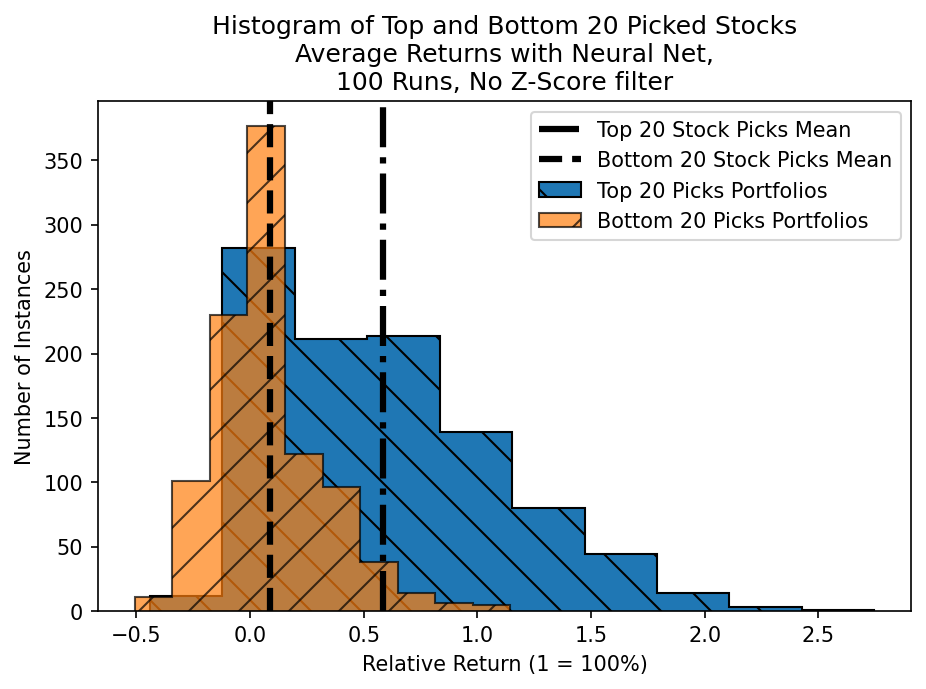

In [615]:
NN_stockReturnResults['top'].hist(hatch='\\', 
                                  edgecolor='k', 
                                  histtype='step', 
                                  fill=True)

NN_stockReturnResults['bot'].hist(hatch='/', 
                                  alpha=0.7, 
                                  edgecolor='k', 
                                  histtype='step', 
                                  fill=True)

plt.axvline(NN_stockReturnResults['top'].mean(), 
            color='k', linestyle='-.', linewidth=3)
plt.axvline(NN_stockReturnResults['bot'].mean(), 
            color='k', linestyle='--', linewidth=3)

plt.legend(['Top 20 Stock Picks Mean',
            'Bottom 20 Stock Picks Mean',
            'Top 20 Picks Portfolios',
            'Bottom 20 Picks Portfolios']);

plt.xlabel('Relative Return (1 = 100%)');
plt.ylabel('Number of Instances');
plt.title('Histogram of Top and Bottom 20 Picked Stocks\n'+\
          'Average Returns with Neural Net,\n'+\
          '100 Runs, No Z-Score filter');
plt.grid()

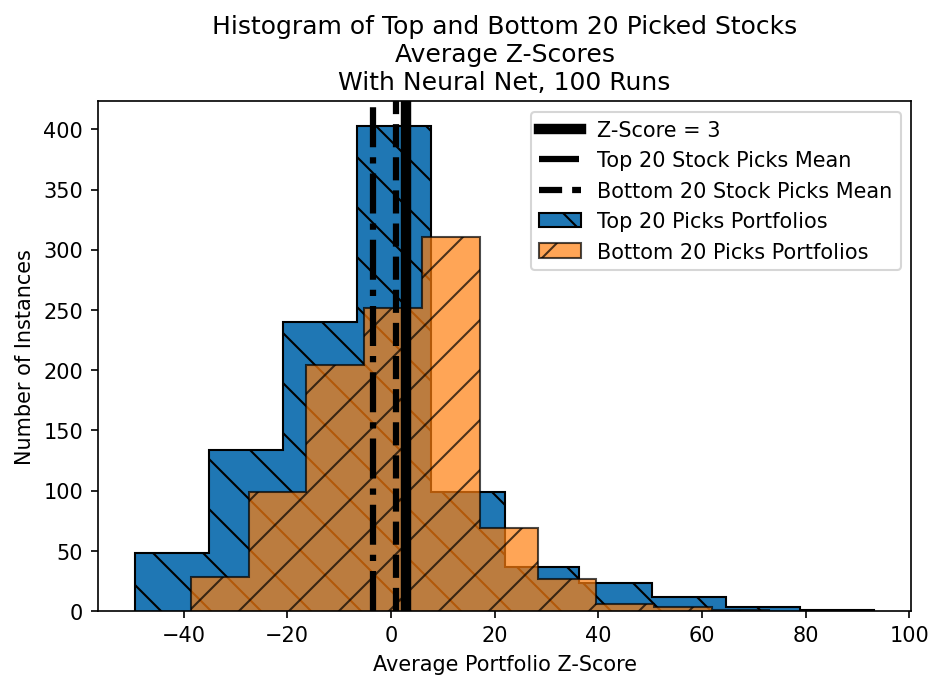

In [616]:
NN_stockReturnResults['topZ'].hist(hatch='\\', 
                                  edgecolor='k', 
                                  histtype='step', 
                                  fill=True)

NN_stockReturnResults['botZ'].hist(hatch='/', 
                                  alpha=0.7, 
                                  edgecolor='k', 
                                  histtype='step', 
                                  fill=True)

plt.axvline(3, color='k', linestyle='-', linewidth=5)
plt.axvline(NN_stockReturnResults['topZ'].mean(), 
            color='k', linestyle='-.', linewidth=3)
plt.axvline(NN_stockReturnResults['botZ'].mean(), 
            color='k', linestyle='--', linewidth=3)

plt.legend(['Z-Score = 3',
            'Top 20 Stock Picks Mean',
            'Bottom 20 Stock Picks Mean',
            'Top 20 Picks Portfolios',
            'Bottom 20 Picks Portfolios']);
plt.xlabel('Average Portfolio Z-Score');
plt.ylabel('Number of Instances');
plt.title('Histogram of Top and Bottom 20 Picked Stocks\n'+\
          'Average Z-Scores\n'+\
          'With Neural Net, 100 Runs');
plt.grid()
# This is not good.

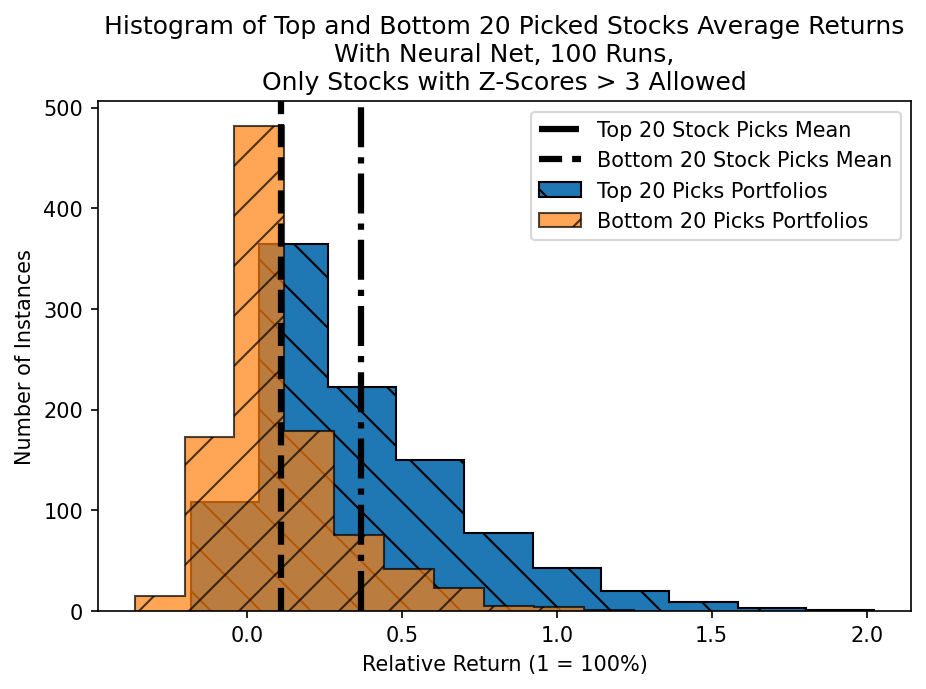

In [617]:
NN_stockReturnResults['topFiltered'].hist(hatch='\\', 
                                          edgecolor='k', 
                                          histtype='step', 
                                          fill=True)

NN_stockReturnResults['botFiltered'].hist(hatch='/', 
                                          alpha=0.7, 
                                          edgecolor='k',
                                          histtype='step', 
                                          fill=True)

plt.axvline(NN_stockReturnResults['topFiltered'].mean(), 
            color='k', linestyle='-.', linewidth=3)
plt.axvline(NN_stockReturnResults['botFiltered'].mean(), 
            color='k', linestyle='--', linewidth=3)


plt.legend(['Top 20 Stock Picks Mean',
            'Bottom 20 Stock Picks Mean',
            'Top 20 Picks Portfolios',
            'Bottom 20 Picks Portfolios']);
plt.xlabel('Relative Return (1 = 100%)');
plt.ylabel('Number of Instances');
plt.title('Histogram of Top and Bottom 20 Picked Stocks Average Returns\n'+\
          'With Neural Net, 100 Runs,\n'+\
          'Only Stocks with Z-Scores > 3 Allowed');
plt.grid()

# Tweaking Some Hyperparameters

In [10]:
def newModel(networkLayers=2):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(18, activation = 'relu', input_shape = (18,)))
    for i in range(0,networkLayers):
        model.add(keras.layers.Dense(18, activation='relu'))
    model.add(keras.layers.Dense(10, activation='relu'))
    model.add(keras.layers.Dense(10, activation='relu'))
    model.add(keras.layers.Dense(1, activation='relu'))

    optimizer = keras.optimizers.Adam(learning_rate = 0.0001,  
                                      amsgrad = False)

    model.compile(loss='mean_squared_error', optimizer=optimizer)
    #model.summary()
    return model

In [11]:
# Store Neural Net Stock Pick Performances in DataFrame

def neuralNetHyperparameterTestsStockPickingPerf(numberOfLayers=[2],
                                                 numberOfEpochs=[20],
                                                 batchSizes=[512],
                                                 numberOfRuns=100):
    '''
    Test out hyperparameters for the neural net.
    '''
    for layers in numberOfLayers:
        for epochs in numberOfEpochs:
            for batchSize in batchSizes:
                for i in range(0, numberOfRuns):
                    model = newModel()
                    history = model.fit(X_train, y_train, 
                                        batch_size=batchSize, 
                                        epochs=epochs, 
                                        validation_data=(X_test, y_test), 
                                        verbose=0)
                    y_pred = model.predict(X_test)
                    answers = \
                    pd.DataFrame(np.concatenate((y_test, y_pred, z_test), 
                                                axis=1),
                                 columns=['y_test', 'y_pred', 'z_test'])\
                    .sort_values(by='y_pred', ascending=False).reset_index()
                    
                    answers['z_test'] = answers['z_test'].clip(-100,100)
                    answers[['y_test', 'y_pred']] = \
                    (answers[['y_test', 'y_pred']] * 11) - 1
                    
                    portSize=20
                    topFiltered = answers[answers['z_test']>3]\
                    .head(portSize).reset_index(drop=True)
                    
                    botFiltered = answers[answers['z_test']>3]\
                    .tail(portSize).reset_index(drop=True)

                    top = answers.head(portSize).reset_index(drop=True)
                    bot = answers.tail(portSize)

                    row = {'layers':layers,
                           'epochs':epochs,
                           'batchSize':batchSize,
                           #Portfolio of top picks
                           'top': round(top['y_test'].mean(),4),
                           
                           #Portfolio of bottom picks
                           'bot': round(bot['y_test'].mean(),4), 
                           
                           # Avg. Z score of top picks
                           'topZ': round(top['z_test'].mean(),4), 
                           
                           # Avg. Z score of bottom picks
                           'botZ': round(bot['z_test'].mean(),4), 
                           
                            #Portfolio of top picks only Z>3 stocks allowed
                           'topFiltered': round(topFiltered['y_test'].mean(),4), 
                           
                            #Portfolio of Bottom picks only Z>3 stocks allowed
                           'botFiltered': round(botFiltered['y_test'].mean(),4), 
                          }
                    print(row)
                    
                    performance_df = pd.DataFrame()
                    performance_df = performance_df.append(row, ignore_index=True)
                    resultsFilename = \
                    'neuralNetHyperparameterTestsStockPickingPerf.csv'
                    
                    if os.path.exists(resultsFilename):
                        performance_df.to_csv(resultsFilename, 
                                              mode='a', 
                                              index=False, 
                                              header=False)
                    else:
                        performance_df.to_csv(resultsFilename, 
                                              index=False)
        

In [12]:
# First vary the number of layers
neuralNetHyperparameterTestsStockPickingPerf(numberOfLayers=[1,2,4,8,16])

# Vary the number of epochs
neuralNetHyperparameterTestsStockPickingPerf(numberOfEpochs=[5,10,40,200,500])

# Vary the batch size
neuralNetHyperparameterTestsStockPickingPerf(batchSizes=[16,64,512,1024])

# Try very high epochs AND high number of layers
neuralNetHyperparameterTestsStockPickingPerf(numberOfEpochs=[200],
                                             numberOfLayers=[16])

{'layers': 2, 'epochs': 20, 'batchSize': 16, 'top': 1.0323, 'bot': 0.6143, 'topZ': -25.5929, 'botZ': -40.4652, 'topFiltered': 0.2966, 'botFiltered': 0.6976}
{'layers': 2, 'epochs': 20, 'batchSize': 16, 'top': 0.1372, 'bot': -0.2316, 'topZ': -9.4996, 'botZ': 1.9358, 'topFiltered': 0.3212, 'botFiltered': -0.0057}
{'layers': 2, 'epochs': 20, 'batchSize': 16, 'top': 0.9033, 'bot': -0.1712, 'topZ': -29.9927, 'botZ': 14.4643, 'topFiltered': 0.0478, 'botFiltered': -0.1047}
{'layers': 2, 'epochs': 20, 'batchSize': 16, 'top': 0.3391, 'bot': -0.2338, 'topZ': -32.4817, 'botZ': 2.9569, 'topFiltered': 0.5023, 'botFiltered': -0.123}
{'layers': 2, 'epochs': 20, 'batchSize': 16, 'top': 0.32, 'bot': -0.0148, 'topZ': -40.1853, 'botZ': 39.7945, 'topFiltered': 0.6621, 'botFiltered': -0.0309}
{'layers': 2, 'epochs': 20, 'batchSize': 16, 'top': 0.0773, 'bot': 0.1004, 'topZ': 6.382, 'botZ': 8.3353, 'topFiltered': 0.1463, 'botFiltered': 0.0746}
{'layers': 2, 'epochs': 20, 'batchSize': 16, 'top': 0.6204, 'bot'

{'layers': 2, 'epochs': 20, 'batchSize': 16, 'top': 0.007, 'bot': -0.093, 'topZ': -37.3081, 'botZ': -7.1328, 'topFiltered': 0.4788, 'botFiltered': 0.5002}
{'layers': 2, 'epochs': 20, 'batchSize': 16, 'top': 1.3088, 'bot': 0.2324, 'topZ': -22.6525, 'botZ': -39.7643, 'topFiltered': 0.6665, 'botFiltered': 0.6825}
{'layers': 2, 'epochs': 20, 'batchSize': 16, 'top': 1.0993, 'bot': 0.2361, 'topZ': -15.6745, 'botZ': -42.0051, 'topFiltered': 0.2573, 'botFiltered': 0.3877}
{'layers': 2, 'epochs': 20, 'batchSize': 16, 'top': 1.0921, 'bot': -0.0458, 'topZ': -21.7131, 'botZ': -41.3837, 'topFiltered': 0.5297, 'botFiltered': 0.4722}
{'layers': 2, 'epochs': 20, 'batchSize': 16, 'top': 0.2954, 'bot': -0.0652, 'topZ': -23.0447, 'botZ': 0.6016, 'topFiltered': 0.3226, 'botFiltered': -0.2062}
{'layers': 2, 'epochs': 20, 'batchSize': 16, 'top': 0.007, 'bot': -0.0253, 'topZ': -29.312, 'botZ': 23.5506, 'topFiltered': 0.9906, 'botFiltered': 0.3785}
{'layers': 2, 'epochs': 20, 'batchSize': 16, 'top': 1.2519, '

{'layers': 2, 'epochs': 20, 'batchSize': 64, 'top': 0.0773, 'bot': 0.1004, 'topZ': 6.382, 'botZ': 8.3353, 'topFiltered': 0.1463, 'botFiltered': 0.0746}
{'layers': 2, 'epochs': 20, 'batchSize': 64, 'top': 1.2711, 'bot': 0.3005, 'topZ': -15.6316, 'botZ': -19.8217, 'topFiltered': 0.107, 'botFiltered': 0.3498}
{'layers': 2, 'epochs': 20, 'batchSize': 64, 'top': 0.8275, 'bot': 0.0538, 'topZ': -10.6053, 'botZ': 20.662, 'topFiltered': 0.3586, 'botFiltered': 0.0526}
{'layers': 2, 'epochs': 20, 'batchSize': 64, 'top': 0.736, 'bot': -0.2056, 'topZ': 6.112, 'botZ': 13.3268, 'topFiltered': 0.6638, 'botFiltered': -0.2056}
{'layers': 2, 'epochs': 20, 'batchSize': 64, 'top': 0.9103, 'bot': -0.2221, 'topZ': -9.9012, 'botZ': 10.025, 'topFiltered': 0.2609, 'botFiltered': -0.1079}
{'layers': 2, 'epochs': 20, 'batchSize': 64, 'top': 0.9346, 'bot': -0.0695, 'topZ': -46.237, 'botZ': 0.3328, 'topFiltered': 0.3869, 'botFiltered': 0.0358}
{'layers': 2, 'epochs': 20, 'batchSize': 64, 'top': 0.9876, 'bot': -0.05

{'layers': 2, 'epochs': 20, 'batchSize': 64, 'top': 0.6712, 'bot': -0.2281, 'topZ': -4.943, 'botZ': 4.6883, 'topFiltered': 0.9057, 'botFiltered': 0.0591}
{'layers': 2, 'epochs': 20, 'batchSize': 64, 'top': 1.155, 'bot': 0.238, 'topZ': -7.2081, 'botZ': -18.002, 'topFiltered': 0.0289, 'botFiltered': 0.6647}
{'layers': 2, 'epochs': 20, 'batchSize': 64, 'top': 0.499, 'bot': -0.0189, 'topZ': -19.8018, 'botZ': -29.15, 'topFiltered': 0.4925, 'botFiltered': 0.0048}
{'layers': 2, 'epochs': 20, 'batchSize': 64, 'top': 1.1721, 'bot': 0.7724, 'topZ': -25.7767, 'botZ': -22.8013, 'topFiltered': 0.3773, 'botFiltered': 0.1486}
{'layers': 2, 'epochs': 20, 'batchSize': 64, 'top': 0.0773, 'bot': 0.1004, 'topZ': 6.382, 'botZ': 8.3353, 'topFiltered': 0.1463, 'botFiltered': 0.0746}
{'layers': 2, 'epochs': 20, 'batchSize': 64, 'top': 0.0773, 'bot': 0.1004, 'topZ': 6.382, 'botZ': 8.3353, 'topFiltered': 0.1463, 'botFiltered': 0.0746}
{'layers': 2, 'epochs': 20, 'batchSize': 64, 'top': 1.2404, 'bot': -0.039, 't

{'layers': 2, 'epochs': 20, 'batchSize': 64, 'top': 0.2317, 'bot': -0.2424, 'topZ': -45.7945, 'botZ': -12.6123, 'topFiltered': 0.0025, 'botFiltered': -0.008}
{'layers': 2, 'epochs': 20, 'batchSize': 64, 'top': 0.6838, 'bot': 0.0292, 'topZ': 46.5939, 'botZ': 1.8869, 'topFiltered': 0.1733, 'botFiltered': 0.0562}
{'layers': 2, 'epochs': 20, 'batchSize': 64, 'top': 0.016, 'bot': -0.1244, 'topZ': -12.8004, 'botZ': -4.6552, 'topFiltered': 0.2755, 'botFiltered': -0.0591}
{'layers': 2, 'epochs': 20, 'batchSize': 64, 'top': 0.0773, 'bot': 0.1004, 'topZ': 6.382, 'botZ': 8.3353, 'topFiltered': 0.1463, 'botFiltered': 0.0746}
{'layers': 2, 'epochs': 20, 'batchSize': 64, 'top': -0.0082, 'bot': 0.1004, 'topZ': 9.9474, 'botZ': 8.3353, 'topFiltered': 0.0962, 'botFiltered': 0.0746}
{'layers': 2, 'epochs': 20, 'batchSize': 64, 'top': 0.922, 'bot': -0.0719, 'topZ': 30.1165, 'botZ': -15.3902, 'topFiltered': 0.1462, 'botFiltered': -0.1234}
{'layers': 2, 'epochs': 20, 'batchSize': 64, 'top': 1.1908, 'bot': 0

{'layers': 2, 'epochs': 20, 'batchSize': 64, 'top': 0.6393, 'bot': -0.18, 'topZ': -32.0816, 'botZ': -1.2219, 'topFiltered': 0.1279, 'botFiltered': 0.0502}
{'layers': 2, 'epochs': 20, 'batchSize': 64, 'top': -0.1686, 'bot': -0.0196, 'topZ': -25.9054, 'botZ': -17.2569, 'topFiltered': 0.8803, 'botFiltered': 0.1465}
{'layers': 2, 'epochs': 20, 'batchSize': 64, 'top': -0.1261, 'bot': 0.13, 'topZ': -4.9271, 'botZ': -17.6749, 'topFiltered': 0.4194, 'botFiltered': 0.0208}
{'layers': 2, 'epochs': 20, 'batchSize': 64, 'top': 0.6878, 'bot': 0.1444, 'topZ': -9.3779, 'botZ': 3.0255, 'topFiltered': 1.8461, 'botFiltered': -0.1557}
{'layers': 2, 'epochs': 20, 'batchSize': 64, 'top': 0.1223, 'bot': -0.243, 'topZ': -5.3374, 'botZ': -7.9221, 'topFiltered': 1.1244, 'botFiltered': -0.1573}
{'layers': 2, 'epochs': 20, 'batchSize': 64, 'top': 0.3122, 'bot': -0.1793, 'topZ': -16.2585, 'botZ': -20.0899, 'topFiltered': 0.2568, 'botFiltered': -0.0123}
{'layers': 2, 'epochs': 20, 'batchSize': 64, 'top': 0.6409, '

{'layers': 2, 'epochs': 20, 'batchSize': 512, 'top': 0.0366, 'bot': -0.0746, 'topZ': -8.3937, 'botZ': 1.3153, 'topFiltered': 0.4362, 'botFiltered': 0.2044}
{'layers': 2, 'epochs': 20, 'batchSize': 512, 'top': 0.2171, 'bot': 0.1144, 'topZ': 11.9868, 'botZ': 33.5084, 'topFiltered': 0.5077, 'botFiltered': 0.0852}
{'layers': 2, 'epochs': 20, 'batchSize': 512, 'top': 0.2617, 'bot': -0.0202, 'topZ': 68.576, 'botZ': -5.0755, 'topFiltered': 0.1051, 'botFiltered': -0.0574}
{'layers': 2, 'epochs': 20, 'batchSize': 512, 'top': 0.3258, 'bot': -0.0337, 'topZ': -16.7995, 'botZ': -6.5435, 'topFiltered': 0.5257, 'botFiltered': 0.0069}
{'layers': 2, 'epochs': 20, 'batchSize': 512, 'top': 0.1329, 'bot': -0.0527, 'topZ': -24.6143, 'botZ': 15.4521, 'topFiltered': 0.4681, 'botFiltered': 0.0836}
{'layers': 2, 'epochs': 20, 'batchSize': 512, 'top': 0.8682, 'bot': 0.0608, 'topZ': -10.2066, 'botZ': 12.7031, 'topFiltered': 0.3989, 'botFiltered': 0.0865}
{'layers': 2, 'epochs': 20, 'batchSize': 512, 'top': 1.827

{'layers': 2, 'epochs': 20, 'batchSize': 512, 'top': 0.0773, 'bot': 0.1004, 'topZ': 6.382, 'botZ': 8.3353, 'topFiltered': 0.1463, 'botFiltered': 0.0746}
{'layers': 2, 'epochs': 20, 'batchSize': 512, 'top': 0.1113, 'bot': 0.6904, 'topZ': 2.7534, 'botZ': -1.7647, 'topFiltered': -0.0411, 'botFiltered': 0.4208}
{'layers': 2, 'epochs': 20, 'batchSize': 512, 'top': 1.3911, 'bot': 0.2591, 'topZ': -39.484, 'botZ': -19.769, 'topFiltered': 0.2708, 'botFiltered': 0.8896}
{'layers': 2, 'epochs': 20, 'batchSize': 512, 'top': 1.0358, 'bot': 0.0759, 'topZ': -35.7988, 'botZ': 18.6957, 'topFiltered': 0.519, 'botFiltered': 0.2498}
{'layers': 2, 'epochs': 20, 'batchSize': 512, 'top': 0.0773, 'bot': 0.1004, 'topZ': 6.382, 'botZ': 8.3353, 'topFiltered': 0.1463, 'botFiltered': 0.0746}
{'layers': 2, 'epochs': 20, 'batchSize': 512, 'top': 0.4485, 'bot': 0.2313, 'topZ': -1.0, 'botZ': -12.2324, 'topFiltered': 0.7968, 'botFiltered': 0.0374}
{'layers': 2, 'epochs': 20, 'batchSize': 512, 'top': 1.1847, 'bot': 0.04

{'layers': 2, 'epochs': 20, 'batchSize': 512, 'top': 0.6948, 'bot': 0.7345, 'topZ': -33.5744, 'botZ': -1.5305, 'topFiltered': 0.3785, 'botFiltered': -0.2085}
{'layers': 2, 'epochs': 20, 'batchSize': 512, 'top': 0.1874, 'bot': 0.1552, 'topZ': -20.8904, 'botZ': 8.315, 'topFiltered': 0.1845, 'botFiltered': 0.012}
{'layers': 2, 'epochs': 20, 'batchSize': 512, 'top': -0.1266, 'bot': 0.2542, 'topZ': -20.4049, 'botZ': -1.722, 'topFiltered': 0.1703, 'botFiltered': 0.0572}
{'layers': 2, 'epochs': 20, 'batchSize': 512, 'top': 0.5711, 'bot': 0.5731, 'topZ': -47.4472, 'botZ': -1.9789, 'topFiltered': 0.153, 'botFiltered': 0.565}
{'layers': 2, 'epochs': 20, 'batchSize': 512, 'top': 1.5299, 'bot': -0.2226, 'topZ': -18.1462, 'botZ': -9.6654, 'topFiltered': 0.4419, 'botFiltered': 0.4468}
{'layers': 2, 'epochs': 20, 'batchSize': 512, 'top': 0.1058, 'bot': 0.2913, 'topZ': -6.9253, 'botZ': -19.0483, 'topFiltered': 0.2366, 'botFiltered': 0.1351}
{'layers': 2, 'epochs': 20, 'batchSize': 512, 'top': 0.676, '

{'layers': 2, 'epochs': 20, 'batchSize': 512, 'top': 0.6936, 'bot': -0.1606, 'topZ': 50.539, 'botZ': -7.1186, 'topFiltered': 0.6898, 'botFiltered': -0.0021}
{'layers': 2, 'epochs': 20, 'batchSize': 512, 'top': 1.4387, 'bot': -0.2978, 'topZ': -9.5805, 'botZ': -2.2201, 'topFiltered': 1.5108, 'botFiltered': -0.0058}
{'layers': 2, 'epochs': 20, 'batchSize': 512, 'top': 0.1956, 'bot': 0.0365, 'topZ': 3.7837, 'botZ': -4.859, 'topFiltered': 0.3182, 'botFiltered': 0.342}
{'layers': 2, 'epochs': 20, 'batchSize': 512, 'top': 0.4338, 'bot': 0.1528, 'topZ': -36.0299, 'botZ': 11.56, 'topFiltered': 0.3046, 'botFiltered': 0.4749}
{'layers': 2, 'epochs': 20, 'batchSize': 512, 'top': 1.4382, 'bot': -0.0882, 'topZ': -49.0532, 'botZ': -0.4804, 'topFiltered': 0.2508, 'botFiltered': -0.0856}
{'layers': 2, 'epochs': 20, 'batchSize': 512, 'top': 0.2647, 'bot': 0.2507, 'topZ': 20.0697, 'botZ': -23.1462, 'topFiltered': 0.2959, 'botFiltered': 0.113}
{'layers': 2, 'epochs': 20, 'batchSize': 512, 'top': 0.4162, '

{'layers': 2, 'epochs': 20, 'batchSize': 1024, 'top': 0.9667, 'bot': -0.1868, 'topZ': -11.4841, 'botZ': -22.4756, 'topFiltered': 0.3686, 'botFiltered': -0.0901}
{'layers': 2, 'epochs': 20, 'batchSize': 1024, 'top': 0.3281, 'bot': 0.048, 'topZ': -43.5153, 'botZ': -25.67, 'topFiltered': 0.1853, 'botFiltered': 0.0568}
{'layers': 2, 'epochs': 20, 'batchSize': 1024, 'top': 0.197, 'bot': -0.0091, 'topZ': 12.1009, 'botZ': 9.6658, 'topFiltered': 0.0491, 'botFiltered': 0.0104}
{'layers': 2, 'epochs': 20, 'batchSize': 1024, 'top': 0.0163, 'bot': 0.1677, 'topZ': 4.2933, 'botZ': -0.1355, 'topFiltered': -0.0135, 'botFiltered': 0.2153}
{'layers': 2, 'epochs': 20, 'batchSize': 1024, 'top': 0.3731, 'bot': 0.0095, 'topZ': 21.0591, 'botZ': 14.751, 'topFiltered': 0.0644, 'botFiltered': 0.0113}
{'layers': 2, 'epochs': 20, 'batchSize': 1024, 'top': 0.2535, 'bot': -0.2227, 'topZ': 29.042, 'botZ': -8.5216, 'topFiltered': 0.1588, 'botFiltered': 0.129}
{'layers': 2, 'epochs': 20, 'batchSize': 1024, 'top': 0.60

{'layers': 2, 'epochs': 20, 'batchSize': 1024, 'top': -0.1128, 'bot': 0.2933, 'topZ': 25.1653, 'botZ': -1.4666, 'topFiltered': -0.0401, 'botFiltered': 0.2213}
{'layers': 2, 'epochs': 20, 'batchSize': 1024, 'top': 0.9168, 'bot': 0.0437, 'topZ': -21.7772, 'botZ': -9.068, 'topFiltered': 0.5909, 'botFiltered': 0.0685}
{'layers': 2, 'epochs': 20, 'batchSize': 1024, 'top': 1.4824, 'bot': -0.1838, 'topZ': 7.8687, 'botZ': -10.9119, 'topFiltered': 0.7782, 'botFiltered': -0.0155}
{'layers': 2, 'epochs': 20, 'batchSize': 1024, 'top': 0.3733, 'bot': -0.0209, 'topZ': 62.2809, 'botZ': -28.4594, 'topFiltered': 0.3961, 'botFiltered': -0.0488}
{'layers': 2, 'epochs': 20, 'batchSize': 1024, 'top': 0.0773, 'bot': 0.1004, 'topZ': 6.382, 'botZ': 8.3353, 'topFiltered': 0.1463, 'botFiltered': 0.0746}
{'layers': 2, 'epochs': 20, 'batchSize': 1024, 'top': 1.0923, 'bot': 0.0417, 'topZ': -16.8874, 'botZ': 10.4985, 'topFiltered': -0.0538, 'botFiltered': 0.0623}
{'layers': 2, 'epochs': 20, 'batchSize': 1024, 'top'

{'layers': 2, 'epochs': 20, 'batchSize': 1024, 'top': 0.9489, 'bot': -0.2403, 'topZ': 1.4079, 'botZ': -4.6356, 'topFiltered': 0.2798, 'botFiltered': 0.6018}
{'layers': 2, 'epochs': 20, 'batchSize': 1024, 'top': 0.8241, 'bot': -0.2575, 'topZ': 22.5368, 'botZ': 22.137, 'topFiltered': 0.7317, 'botFiltered': -0.2121}
{'layers': 2, 'epochs': 20, 'batchSize': 1024, 'top': 0.2954, 'bot': 0.2844, 'topZ': 11.1753, 'botZ': -17.1352, 'topFiltered': 0.3843, 'botFiltered': 0.0071}
{'layers': 2, 'epochs': 20, 'batchSize': 1024, 'top': -0.0504, 'bot': 1.1034, 'topZ': 4.6935, 'botZ': 17.8511, 'topFiltered': 0.097, 'botFiltered': 0.0016}
{'layers': 2, 'epochs': 20, 'batchSize': 1024, 'top': 0.6036, 'bot': 0.483, 'topZ': 29.867, 'botZ': -0.1296, 'topFiltered': 0.1631, 'botFiltered': 0.5275}
{'layers': 2, 'epochs': 20, 'batchSize': 1024, 'top': 0.3425, 'bot': -0.0642, 'topZ': 4.7626, 'botZ': -26.0522, 'topFiltered': 0.2004, 'botFiltered': -0.178}
{'layers': 2, 'epochs': 20, 'batchSize': 1024, 'top': -0.1

{'layers': 2, 'epochs': 20, 'batchSize': 1024, 'top': 0.4281, 'bot': -0.0246, 'topZ': 62.158, 'botZ': -5.4463, 'topFiltered': 0.1807, 'botFiltered': -0.0346}
{'layers': 2, 'epochs': 20, 'batchSize': 1024, 'top': 0.9583, 'bot': 0.0408, 'topZ': -27.6802, 'botZ': -4.4159, 'topFiltered': 0.1743, 'botFiltered': -0.2117}
{'layers': 2, 'epochs': 20, 'batchSize': 1024, 'top': 0.0773, 'bot': 0.1004, 'topZ': 6.382, 'botZ': 8.3353, 'topFiltered': 0.1463, 'botFiltered': 0.0746}
{'layers': 2, 'epochs': 20, 'batchSize': 1024, 'top': 0.4597, 'bot': 0.3848, 'topZ': 57.6314, 'botZ': 42.112, 'topFiltered': 0.3641, 'botFiltered': 0.2634}
{'layers': 2, 'epochs': 20, 'batchSize': 1024, 'top': 0.4411, 'bot': 0.0028, 'topZ': 10.7607, 'botZ': 1.9478, 'topFiltered': 0.2627, 'botFiltered': 0.1731}
{'layers': 2, 'epochs': 20, 'batchSize': 1024, 'top': 0.4925, 'bot': 0.0335, 'topZ': 42.8189, 'botZ': -4.3171, 'topFiltered': 0.3834, 'botFiltered': 0.2926}
{'layers': 2, 'epochs': 20, 'batchSize': 1024, 'top': 0.0773

{'layers': 16, 'epochs': 200, 'batchSize': 512, 'top': 0.0773, 'bot': 0.1004, 'topZ': 6.382, 'botZ': 8.3353, 'topFiltered': 0.1463, 'botFiltered': 0.0746}
{'layers': 16, 'epochs': 200, 'batchSize': 512, 'top': 1.1997, 'bot': 0.3878, 'topZ': -30.4549, 'botZ': -33.9668, 'topFiltered': 0.2847, 'botFiltered': -0.1477}
{'layers': 16, 'epochs': 200, 'batchSize': 512, 'top': 0.6194, 'bot': 0.1691, 'topZ': -40.6583, 'botZ': 3.1806, 'topFiltered': 0.583, 'botFiltered': -0.0585}
{'layers': 16, 'epochs': 200, 'batchSize': 512, 'top': 0.4157, 'bot': 0.2687, 'topZ': -7.8997, 'botZ': -21.2365, 'topFiltered': 0.3887, 'botFiltered': 0.0798}
{'layers': 16, 'epochs': 200, 'batchSize': 512, 'top': 0.0773, 'bot': 0.1004, 'topZ': 6.382, 'botZ': 8.3353, 'topFiltered': 0.1463, 'botFiltered': 0.0746}
{'layers': 16, 'epochs': 200, 'batchSize': 512, 'top': 1.2703, 'bot': 0.1197, 'topZ': -18.3857, 'botZ': -15.6187, 'topFiltered': 1.1296, 'botFiltered': 0.0306}
{'layers': 16, 'epochs': 200, 'batchSize': 512, 'top

{'layers': 16, 'epochs': 200, 'batchSize': 512, 'top': 1.4832, 'bot': -0.1835, 'topZ': -11.2402, 'botZ': -23.5655, 'topFiltered': 0.51, 'botFiltered': 0.7549}
{'layers': 16, 'epochs': 200, 'batchSize': 512, 'top': -0.1352, 'bot': 0.107, 'topZ': -25.9515, 'botZ': -19.1679, 'topFiltered': 0.413, 'botFiltered': -0.0502}
{'layers': 16, 'epochs': 200, 'batchSize': 512, 'top': 0.8686, 'bot': -0.2095, 'topZ': -29.4017, 'botZ': -34.9803, 'topFiltered': 0.0513, 'botFiltered': 0.3035}
{'layers': 16, 'epochs': 200, 'batchSize': 512, 'top': 0.8435, 'bot': -0.0776, 'topZ': -32.0834, 'botZ': 36.4442, 'topFiltered': 0.5416, 'botFiltered': -0.0908}
{'layers': 16, 'epochs': 200, 'batchSize': 512, 'top': 1.2435, 'bot': -0.236, 'topZ': -12.9663, 'botZ': -27.8635, 'topFiltered': 0.4606, 'botFiltered': -0.0646}
{'layers': 16, 'epochs': 200, 'batchSize': 512, 'top': 1.3366, 'bot': 1.1052, 'topZ': -25.4692, 'botZ': -27.1236, 'topFiltered': 0.2327, 'botFiltered': -0.0483}
{'layers': 16, 'epochs': 200, 'batchS

{'layers': 16, 'epochs': 200, 'batchSize': 512, 'top': 0.0773, 'bot': 0.1004, 'topZ': 6.382, 'botZ': 8.3353, 'topFiltered': 0.1463, 'botFiltered': 0.0746}
{'layers': 16, 'epochs': 200, 'batchSize': 512, 'top': 0.9049, 'bot': 0.0557, 'topZ': -22.7291, 'botZ': -0.4732, 'topFiltered': 0.0162, 'botFiltered': -0.1178}
{'layers': 16, 'epochs': 200, 'batchSize': 512, 'top': 0.3823, 'bot': 0.5141, 'topZ': -32.1326, 'botZ': -27.1555, 'topFiltered': 0.0511, 'botFiltered': 0.245}
{'layers': 16, 'epochs': 200, 'batchSize': 512, 'top': 0.5883, 'bot': 0.301, 'topZ': -16.193, 'botZ': 3.5257, 'topFiltered': 0.0063, 'botFiltered': 0.1306}
{'layers': 16, 'epochs': 200, 'batchSize': 512, 'top': 0.5748, 'bot': -0.0992, 'topZ': -32.0231, 'botZ': 2.0149, 'topFiltered': 0.7257, 'botFiltered': -0.1182}
{'layers': 16, 'epochs': 200, 'batchSize': 512, 'top': 0.9605, 'bot': 0.3694, 'topZ': -6.9015, 'botZ': -15.1081, 'topFiltered': 0.4079, 'botFiltered': -0.2476}
{'layers': 16, 'epochs': 200, 'batchSize': 512, 't

{'layers': 16, 'epochs': 200, 'batchSize': 512, 'top': 0.8555, 'bot': -0.1682, 'topZ': -4.605, 'botZ': -8.1566, 'topFiltered': -0.1615, 'botFiltered': 0.0692}
{'layers': 16, 'epochs': 200, 'batchSize': 512, 'top': 1.0782, 'bot': 0.2007, 'topZ': -25.7899, 'botZ': -25.6843, 'topFiltered': 0.6219, 'botFiltered': -0.0753}
{'layers': 16, 'epochs': 200, 'batchSize': 512, 'top': 0.0039, 'bot': -0.2181, 'topZ': -30.8994, 'botZ': -19.4986, 'topFiltered': -0.0429, 'botFiltered': 0.3391}
{'layers': 16, 'epochs': 200, 'batchSize': 512, 'top': 0.6154, 'bot': 0.2261, 'topZ': -19.8585, 'botZ': -28.3686, 'topFiltered': 0.993, 'botFiltered': 0.5157}
{'layers': 16, 'epochs': 200, 'batchSize': 512, 'top': 0.6281, 'bot': -0.1873, 'topZ': -31.4072, 'botZ': -24.1249, 'topFiltered': 0.0836, 'botFiltered': -0.0344}
{'layers': 16, 'epochs': 200, 'batchSize': 512, 'top': 1.2035, 'bot': 0.1618, 'topZ': -42.9423, 'botZ': -4.0543, 'topFiltered': 0.1915, 'botFiltered': -0.0691}
{'layers': 2, 'epochs': 500, 'batchSi

{'layers': 2, 'epochs': 500, 'batchSize': 512, 'top': 0.5961, 'bot': -0.0817, 'topZ': -7.9289, 'botZ': -13.4397, 'topFiltered': 1.186, 'botFiltered': 0.2116}
{'layers': 2, 'epochs': 500, 'batchSize': 512, 'top': 0.1779, 'bot': 0.4273, 'topZ': -26.8279, 'botZ': -27.1141, 'topFiltered': 0.2581, 'botFiltered': 0.0096}
{'layers': 2, 'epochs': 500, 'batchSize': 512, 'top': 1.0588, 'bot': 0.7658, 'topZ': -29.2833, 'botZ': -25.8217, 'topFiltered': 0.2648, 'botFiltered': 0.0422}
{'layers': 2, 'epochs': 500, 'batchSize': 512, 'top': 0.536, 'bot': 0.9178, 'topZ': -25.4629, 'botZ': -12.8724, 'topFiltered': 0.4765, 'botFiltered': 0.066}
{'layers': 2, 'epochs': 500, 'batchSize': 512, 'top': 0.2178, 'bot': -0.3528, 'topZ': -15.1127, 'botZ': -14.4937, 'topFiltered': 0.3215, 'botFiltered': -0.2189}
{'layers': 2, 'epochs': 500, 'batchSize': 512, 'top': 0.0773, 'bot': 0.1004, 'topZ': 6.382, 'botZ': 8.3353, 'topFiltered': 0.1463, 'botFiltered': 0.0746}
{'layers': 2, 'epochs': 500, 'batchSize': 512, 'top'

{'layers': 2, 'epochs': 500, 'batchSize': 512, 'top': 0.274, 'bot': 0.4628, 'topZ': -28.6794, 'botZ': -26.0528, 'topFiltered': 0.5041, 'botFiltered': -0.0599}
{'layers': 2, 'epochs': 500, 'batchSize': 512, 'top': 0.2767, 'bot': 0.7522, 'topZ': -35.2949, 'botZ': -37.978, 'topFiltered': 0.5493, 'botFiltered': 0.0987}
{'layers': 2, 'epochs': 500, 'batchSize': 512, 'top': 0.5703, 'bot': 0.4373, 'topZ': -26.5696, 'botZ': 44.5769, 'topFiltered': -0.0485, 'botFiltered': -0.1595}
{'layers': 2, 'epochs': 500, 'batchSize': 512, 'top': 0.2927, 'bot': -0.2237, 'topZ': -23.3836, 'botZ': -7.6908, 'topFiltered': 0.2336, 'botFiltered': 0.0244}
{'layers': 2, 'epochs': 500, 'batchSize': 512, 'top': 0.2054, 'bot': -0.2205, 'topZ': -31.493, 'botZ': -23.4106, 'topFiltered': 0.2141, 'botFiltered': 0.0482}
{'layers': 2, 'epochs': 500, 'batchSize': 512, 'top': 0.0773, 'bot': 0.1004, 'topZ': 6.382, 'botZ': 8.3353, 'topFiltered': 0.1463, 'botFiltered': 0.0746}
{'layers': 2, 'epochs': 500, 'batchSize': 512, 'top

{'layers': 2, 'epochs': 500, 'batchSize': 512, 'top': 1.3023, 'bot': -0.3207, 'topZ': -3.6956, 'botZ': -28.975, 'topFiltered': 1.0365, 'botFiltered': -0.2913}
{'layers': 2, 'epochs': 500, 'batchSize': 512, 'top': 0.0773, 'bot': 0.1004, 'topZ': 6.382, 'botZ': 8.3353, 'topFiltered': 0.1463, 'botFiltered': 0.0746}
{'layers': 2, 'epochs': 500, 'batchSize': 512, 'top': 1.7795, 'bot': 0.6227, 'topZ': -14.9444, 'botZ': -25.6737, 'topFiltered': 1.0962, 'botFiltered': 0.3261}
{'layers': 2, 'epochs': 500, 'batchSize': 512, 'top': 0.1188, 'bot': 0.3037, 'topZ': -22.732, 'botZ': -6.1839, 'topFiltered': 0.6007, 'botFiltered': -0.0867}
{'layers': 2, 'epochs': 500, 'batchSize': 512, 'top': 0.1965, 'bot': 0.0183, 'topZ': -17.5676, 'botZ': -30.1169, 'topFiltered': 1.4574, 'botFiltered': -0.1695}
{'layers': 2, 'epochs': 500, 'batchSize': 512, 'top': 0.1408, 'bot': 0.0026, 'topZ': -11.7622, 'botZ': -18.2743, 'topFiltered': 0.6703, 'botFiltered': 0.2461}
{'layers': 2, 'epochs': 500, 'batchSize': 512, 'top

KeyboardInterrupt: 

In [4]:
performance_df=pd.read_csv('neuralNetHyperparameterTestsStockPickingPerf.csv')

plt.figure(figsize=(8,5))
plt.boxplot([performance_df[(performance_df['layers']==2) &
                            (performance_df['epochs']==20) &
                            (performance_df['batchSize']==16)]['topFiltered'],
             performance_df[(performance_df['layers']==2) &
                            (performance_df['epochs']==20) &
                            (performance_df['batchSize']==64)]['topFiltered'],
             performance_df[(performance_df['layers']==2) &
                            (performance_df['epochs']==20) &
                            (performance_df['batchSize']==512)]['topFiltered'],
             performance_df[(performance_df['layers']==2) &
                            (performance_df['epochs']==20) &
                            (performance_df['batchSize']==1024)]['topFiltered']],
            labels=['16','64','512','1024'],
            medianprops={'color':'r','linestyle':'-'},
            boxprops={'linestyle':'-'}, 
            showfliers=False
            );

plt.boxplot([performance_df[(performance_df['layers']==2) &
                            (performance_df['epochs']==20) &
                            (performance_df['batchSize']==16)]['botFiltered'],
             performance_df[(performance_df['layers']==2) &
                            (performance_df['epochs']==20) &
                            (performance_df['batchSize']==64)]['botFiltered'],
             performance_df[(performance_df['layers']==2) &
                            (performance_df['epochs']==20) &
                            (performance_df['batchSize']==512)]['botFiltered'],
             performance_df[(performance_df['layers']==2) &
                            (performance_df['epochs']==20) &
                            (performance_df['batchSize']==1024)]['botFiltered']],
            
            labels=['16','64','512','1024'],
            medianprops={'color':'b','linestyle':':'},
            boxprops={'linestyle':':'}, 
            whiskerprops={'linestyle':':'}, 
            showfliers=False
            );

plt.grid()
plt.ylabel('Top 20 Stock Picks Return');
plt.xlabel('batch size')
plt.title('Top 20 Stock Picks Return,\n Varying batch size', fontsize=20);

import matplotlib.lines as mlines
top_line = mlines.Line2D([],[],color='r', label='Top Picks')
bot_line = mlines.Line2D([],[],color='b',linestyle=':', label='Bottom Picks')

plt.legend(handles=[top_line,bot_line]);

FileNotFoundError: [Errno 2] No such file or directory: 'neuralNetHyperparameterTestsStockPickingPerf.csv'

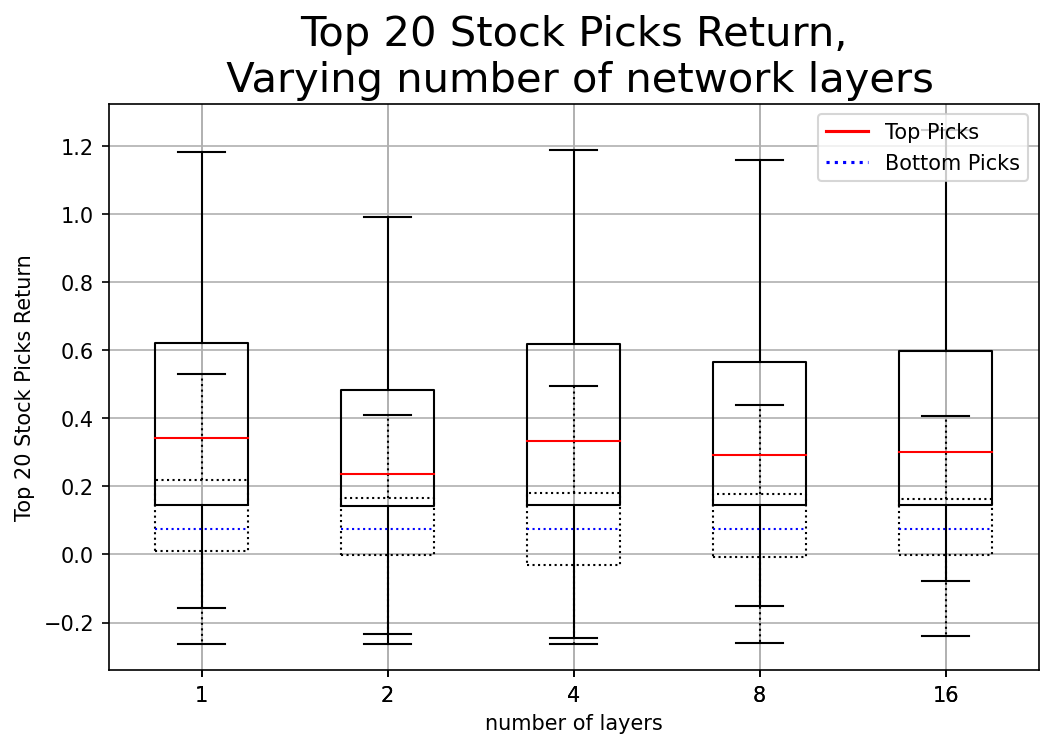

In [35]:
performance_df=pd.read_csv('neuralNetHyperparameterTestsStockPickingPerf.csv')

plt.figure(figsize=(8,5))
plt.boxplot([performance_df[(performance_df['layers']==1) &
                            (performance_df['epochs']==20) &
                            (performance_df['batchSize']==512)]['topFiltered'],
             performance_df[(performance_df['layers']==2) &
                            (performance_df['epochs']==20) &
                            (performance_df['batchSize']==512)]['topFiltered'],
             performance_df[(performance_df['layers']==4) &
                            (performance_df['epochs']==20) &
                            (performance_df['batchSize']==512)]['topFiltered'],
             performance_df[(performance_df['layers']==8) &
                            (performance_df['epochs']==20) &
                            (performance_df['batchSize']==512)]['topFiltered'],
             performance_df[(performance_df['layers']==16) &
                            (performance_df['epochs']==20) &
                            (performance_df['batchSize']==512)]['topFiltered']],
            labels=['1','2','4','8','16'],
            medianprops={'color':'r','linestyle':'-'},
            boxprops={'linestyle':'-'}, 
            showfliers=False
            );

plt.boxplot([performance_df[(performance_df['layers']==1) &
                            (performance_df['epochs']==20) &
                            (performance_df['batchSize']==512)]['botFiltered'],
             performance_df[(performance_df['layers']==2) &
                            (performance_df['epochs']==20) &
                            (performance_df['batchSize']==512)]['botFiltered'],
             performance_df[(performance_df['layers']==4) &
                            (performance_df['epochs']==20) &
                            (performance_df['batchSize']==512)]['botFiltered'],
             performance_df[(performance_df['layers']==8) &
                            (performance_df['epochs']==20) &
                            (performance_df['batchSize']==512)]['botFiltered'],
             performance_df[(performance_df['layers']==16) &
                            (performance_df['epochs']==20) &
                            (performance_df['batchSize']==512)]['botFiltered']],
            
            labels=['1','2','4','8','16'],
            medianprops={'color':'b','linestyle':':'},
            boxprops={'linestyle':':'}, 
            whiskerprops={'linestyle':':'}, 
            showfliers=False
            );

plt.grid()
plt.ylabel('Top 20 Stock Picks Return');
plt.xlabel('number of layers')
plt.title('Top 20 Stock Picks Return,\n Varying number of network layers', fontsize=20);

import matplotlib.lines as mlines
top_line = mlines.Line2D([],[],color='r', label='Top Picks')
bot_line = mlines.Line2D([],[],color='b',linestyle=':', label='Bottom Picks')

plt.legend(handles=[top_line,bot_line]);

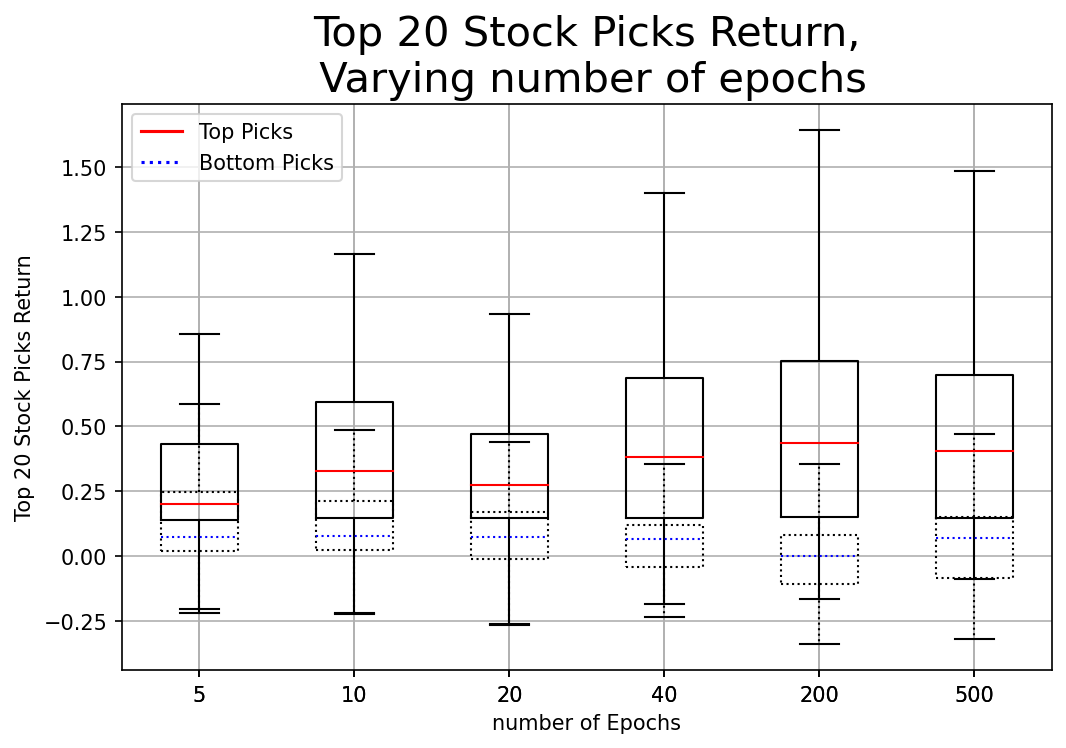

In [16]:
performance_df=pd.read_csv('neuralNetHyperparameterTestsStockPickingPerf.csv')

plt.figure(figsize=(8,5))
plt.boxplot([performance_df[(performance_df['layers']==2) &
                            (performance_df['epochs']==5) &
                            (performance_df['batchSize']==512)]['topFiltered'],
             performance_df[(performance_df['layers']==2) &
                            (performance_df['epochs']==10) &
                            (performance_df['batchSize']==512)]['topFiltered'],
             performance_df[(performance_df['layers']==2) &
                            (performance_df['epochs']==20) &
                            (performance_df['batchSize']==512)]['topFiltered'],
             performance_df[(performance_df['layers']==2) &
                            (performance_df['epochs']==40) &
                            (performance_df['batchSize']==512)]['topFiltered'],
             performance_df[(performance_df['layers']==2) &
                            (performance_df['epochs']==200) &
                            (performance_df['batchSize']==512)]['topFiltered'],
            performance_df[(performance_df['layers']==2) &
                            (performance_df['epochs']==500) &
                            (performance_df['batchSize']==512)]['topFiltered']],
            labels=['5','10','20','40','200','500'],
            medianprops={'color':'r','linestyle':'-'},
            boxprops={'linestyle':'-'}, 
            showfliers=False
            );

plt.boxplot([performance_df[(performance_df['layers']==2) &
                            (performance_df['epochs']==5) &
                            (performance_df['batchSize']==512)]['botFiltered'],
             performance_df[(performance_df['layers']==2) &
                            (performance_df['epochs']==10) &
                            (performance_df['batchSize']==512)]['botFiltered'],
             performance_df[(performance_df['layers']==2) &
                            (performance_df['epochs']==20) &
                            (performance_df['batchSize']==512)]['botFiltered'],
             performance_df[(performance_df['layers']==2) &
                            (performance_df['epochs']==40) &
                            (performance_df['batchSize']==512)]['botFiltered'],
             performance_df[(performance_df['layers']==2) &
                            (performance_df['epochs']==200) &
                            (performance_df['batchSize']==512)]['botFiltered'],
            performance_df[(performance_df['layers']==2) &
                            (performance_df['epochs']==500) &
                            (performance_df['batchSize']==512)]['botFiltered']],
            
            labels=['5','10','20','40','200','500'],
            medianprops={'color':'b','linestyle':':'},
            boxprops={'linestyle':':'}, 
            whiskerprops={'linestyle':':'}, 
            showfliers=False
            );

plt.grid()
plt.ylabel('Top 20 Stock Picks Return');
plt.xlabel('number of Epochs')
plt.title('Top 20 Stock Picks Return,\n Varying number of epochs', fontsize=20);

import matplotlib.lines as mlines
top_line = mlines.Line2D([],[],color='r', label='Top Picks')
bot_line = mlines.Line2D([],[],color='b',linestyle=':', label='Bottom Picks')

plt.legend(handles=[top_line,bot_line]);

<AxesSubplot:>

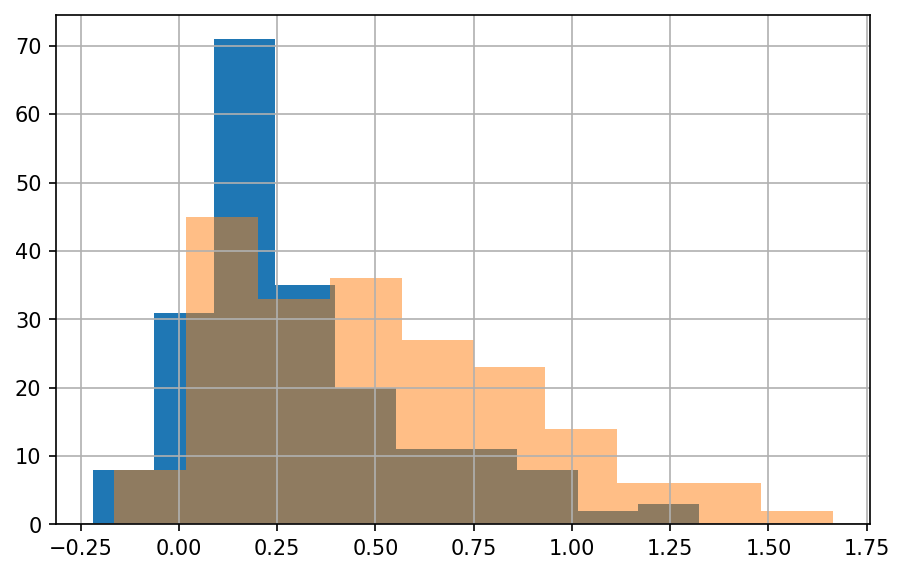

In [32]:
performance_df[(performance_df['layers']==2) &
                            (performance_df['epochs']==5) &
                            (performance_df['batchSize']==512)]['topFiltered'].hist()
performance_df[(performance_df['layers']==2) &
                            (performance_df['epochs']==200) &
                            (performance_df['batchSize']==512)]['topFiltered'].hist(alpha=0.5)